In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import CosineAnnealingLR
from utils import data
import pandas as pd
from torch.utils.data import Subset, DataLoader
from torchvision import transforms
from torch.optim import AdamW
import config
from tqdm import tqdm
import kornia
import matplotlib.pyplot as plt
import numpy as np
from utils import evaluation
import random
from models.msnet import MSNet
from torch.utils.data import DataLoader
from utils.data import create_dataloaders
from utils.train import run_training
import wandb
from PIL import Image
from utils.evaluation import evaluate, visualise_batch_predictions



In [ ]:
#Should be cuda:0 in colab and cpu in local.
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
DATA_PATH = config.PATH_TO_DATA
seed = 42
torch.manual_seed(seed)
max_epochs = 100
batch_size = 16
learning_rate = 1e-3
project_name = "MSNet Baselines"
weight_tensor = torch.tensor([1.0, 1.0], device=device)



cuda:0


In [ ]:
%load_ext autoreload
%autoreload 2
max_epochs = 100
model = MSNet(num_classes=2).to(device)

model.to(device)

optimizer = AdamW(model.parameters(),
                              lr=learning_rate,
                              weight_decay=1e-2)

scheduler = CosineAnnealingLR(optimizer, max_epochs)
criterion = torch.nn.CrossEntropyLoss()

Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 180MB/s]


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


  0%|          | 0/65 [00:00<?, ?it/s]

Train Epoch: 1-0 batch_loss=6.28e-01 batch_acc=0.667
Train Epoch: 1-6 batch_loss=3.46e-01 batch_acc=0.854
Train Epoch: 1-12 batch_loss=2.45e-01 batch_acc=0.895
Train Epoch: 1-18 batch_loss=2.76e-01 batch_acc=0.910
Train Epoch: 1-24 batch_loss=3.63e-01 batch_acc=0.816
Train Epoch: 1-30 batch_loss=4.71e-01 batch_acc=0.822
Train Epoch: 1-36 batch_loss=6.68e-01 batch_acc=0.753
Train Epoch: 1-42 batch_loss=4.32e-01 batch_acc=0.781
Train Epoch: 1-48 batch_loss=3.04e-01 batch_acc=0.859
Train Epoch: 1-54 batch_loss=2.30e-01 batch_acc=0.905
Train Epoch: 1-60 batch_loss=3.61e-01 batch_acc=0.832


  0%|          | 0/65 [00:00<?, ?it/s]

Train Epoch: 2-0 batch_loss=2.61e-01 batch_acc=0.871
Train Epoch: 2-6 batch_loss=3.26e-01 batch_acc=0.856
Train Epoch: 2-12 batch_loss=2.31e-01 batch_acc=0.899
Train Epoch: 2-18 batch_loss=2.72e-01 batch_acc=0.881
Train Epoch: 2-24 batch_loss=3.65e-01 batch_acc=0.799
Train Epoch: 2-30 batch_loss=4.22e-01 batch_acc=0.813
Train Epoch: 2-36 batch_loss=3.65e-01 batch_acc=0.851
Train Epoch: 2-42 batch_loss=4.23e-01 batch_acc=0.805
Train Epoch: 2-48 batch_loss=2.91e-01 batch_acc=0.864
Train Epoch: 2-54 batch_loss=2.13e-01 batch_acc=0.911
Train Epoch: 2-60 batch_loss=3.02e-01 batch_acc=0.881


  0%|          | 0/65 [00:00<?, ?it/s]

Train Epoch: 3-0 batch_loss=2.72e-01 batch_acc=0.869
Train Epoch: 3-6 batch_loss=3.53e-01 batch_acc=0.835
Train Epoch: 3-12 batch_loss=2.69e-01 batch_acc=0.880
Train Epoch: 3-18 batch_loss=2.40e-01 batch_acc=0.931
Train Epoch: 3-24 batch_loss=3.47e-01 batch_acc=0.805
Train Epoch: 3-30 batch_loss=4.61e-01 batch_acc=0.825
Train Epoch: 3-36 batch_loss=2.98e-01 batch_acc=0.877
Train Epoch: 3-42 batch_loss=4.11e-01 batch_acc=0.793
Train Epoch: 3-48 batch_loss=2.87e-01 batch_acc=0.863
Train Epoch: 3-54 batch_loss=2.06e-01 batch_acc=0.916
Train Epoch: 3-60 batch_loss=2.39e-01 batch_acc=0.910


  0%|          | 0/65 [00:00<?, ?it/s]

Train Epoch: 4-0 batch_loss=2.53e-01 batch_acc=0.883
Train Epoch: 4-6 batch_loss=2.60e-01 batch_acc=0.874
Train Epoch: 4-12 batch_loss=2.71e-01 batch_acc=0.877
Train Epoch: 4-18 batch_loss=1.69e-01 batch_acc=0.941
Train Epoch: 4-24 batch_loss=3.16e-01 batch_acc=0.843
Train Epoch: 4-30 batch_loss=4.61e-01 batch_acc=0.800
Train Epoch: 4-36 batch_loss=2.90e-01 batch_acc=0.886
Train Epoch: 4-42 batch_loss=3.63e-01 batch_acc=0.814
Train Epoch: 4-48 batch_loss=3.06e-01 batch_acc=0.845
Train Epoch: 4-54 batch_loss=2.12e-01 batch_acc=0.920
Train Epoch: 4-60 batch_loss=3.24e-01 batch_acc=0.867


  0%|          | 0/65 [00:00<?, ?it/s]

Train Epoch: 5-0 batch_loss=2.23e-01 batch_acc=0.896
Train Epoch: 5-6 batch_loss=2.63e-01 batch_acc=0.887
Train Epoch: 5-12 batch_loss=1.99e-01 batch_acc=0.913
Train Epoch: 5-18 batch_loss=3.20e-01 batch_acc=0.843
Train Epoch: 5-24 batch_loss=3.13e-01 batch_acc=0.835
Train Epoch: 5-30 batch_loss=3.06e-01 batch_acc=0.880
Train Epoch: 5-36 batch_loss=2.76e-01 batch_acc=0.892
Train Epoch: 5-42 batch_loss=4.01e-01 batch_acc=0.799
Train Epoch: 5-48 batch_loss=3.29e-01 batch_acc=0.839
Train Epoch: 5-54 batch_loss=1.88e-01 batch_acc=0.928
Train Epoch: 5-60 batch_loss=2.83e-01 batch_acc=0.881


  0%|          | 0/65 [00:00<?, ?it/s]

Train Epoch: 6-0 batch_loss=2.52e-01 batch_acc=0.862
Train Epoch: 6-6 batch_loss=3.21e-01 batch_acc=0.849
Train Epoch: 6-12 batch_loss=2.06e-01 batch_acc=0.910
Train Epoch: 6-18 batch_loss=1.93e-01 batch_acc=0.930
Train Epoch: 6-24 batch_loss=3.13e-01 batch_acc=0.839
Train Epoch: 6-30 batch_loss=3.14e-01 batch_acc=0.867
Train Epoch: 6-36 batch_loss=4.10e-01 batch_acc=0.841
Train Epoch: 6-42 batch_loss=3.86e-01 batch_acc=0.812
Train Epoch: 6-48 batch_loss=3.29e-01 batch_acc=0.846
Train Epoch: 6-54 batch_loss=1.97e-01 batch_acc=0.923
Train Epoch: 6-60 batch_loss=2.17e-01 batch_acc=0.913


  0%|          | 0/65 [00:00<?, ?it/s]

Train Epoch: 7-0 batch_loss=1.98e-01 batch_acc=0.906
Train Epoch: 7-6 batch_loss=2.62e-01 batch_acc=0.880
Train Epoch: 7-12 batch_loss=2.93e-01 batch_acc=0.856
Train Epoch: 7-18 batch_loss=1.48e-01 batch_acc=0.950
Train Epoch: 7-24 batch_loss=3.53e-01 batch_acc=0.833
Train Epoch: 7-30 batch_loss=3.81e-01 batch_acc=0.848
Train Epoch: 7-36 batch_loss=2.83e-01 batch_acc=0.890
Train Epoch: 7-42 batch_loss=4.59e-01 batch_acc=0.765
Train Epoch: 7-48 batch_loss=3.06e-01 batch_acc=0.858
Train Epoch: 7-54 batch_loss=2.96e-01 batch_acc=0.879
Train Epoch: 7-60 batch_loss=2.98e-01 batch_acc=0.879


  0%|          | 0/65 [00:00<?, ?it/s]

Train Epoch: 8-0 batch_loss=2.59e-01 batch_acc=0.879
Train Epoch: 8-6 batch_loss=2.41e-01 batch_acc=0.889
Train Epoch: 8-12 batch_loss=2.93e-01 batch_acc=0.867
Train Epoch: 8-18 batch_loss=1.41e-01 batch_acc=0.951
Train Epoch: 8-24 batch_loss=3.90e-01 batch_acc=0.798
Train Epoch: 8-30 batch_loss=3.43e-01 batch_acc=0.836
Train Epoch: 8-36 batch_loss=4.06e-01 batch_acc=0.844
Train Epoch: 8-42 batch_loss=3.52e-01 batch_acc=0.818
Train Epoch: 8-48 batch_loss=2.63e-01 batch_acc=0.877
Train Epoch: 8-54 batch_loss=1.88e-01 batch_acc=0.928
Train Epoch: 8-60 batch_loss=4.23e-01 batch_acc=0.842


  0%|          | 0/65 [00:00<?, ?it/s]

Train Epoch: 9-0 batch_loss=2.12e-01 batch_acc=0.888
Train Epoch: 9-6 batch_loss=2.77e-01 batch_acc=0.871
Train Epoch: 9-12 batch_loss=2.67e-01 batch_acc=0.876
Train Epoch: 9-18 batch_loss=2.01e-01 batch_acc=0.924
Train Epoch: 9-24 batch_loss=2.99e-01 batch_acc=0.844
Train Epoch: 9-30 batch_loss=2.93e-01 batch_acc=0.879
Train Epoch: 9-36 batch_loss=3.61e-01 batch_acc=0.855
Train Epoch: 9-42 batch_loss=4.54e-01 batch_acc=0.757
Train Epoch: 9-48 batch_loss=3.24e-01 batch_acc=0.837
Train Epoch: 9-54 batch_loss=2.78e-01 batch_acc=0.880
Train Epoch: 9-60 batch_loss=3.08e-01 batch_acc=0.875


  0%|          | 0/65 [00:00<?, ?it/s]

Train Epoch: 10-0 batch_loss=1.95e-01 batch_acc=0.915
Train Epoch: 10-6 batch_loss=2.50e-01 batch_acc=0.886
Train Epoch: 10-12 batch_loss=1.89e-01 batch_acc=0.909
Train Epoch: 10-18 batch_loss=1.48e-01 batch_acc=0.947
Train Epoch: 10-24 batch_loss=2.99e-01 batch_acc=0.850
Train Epoch: 10-30 batch_loss=3.55e-01 batch_acc=0.862
Train Epoch: 10-36 batch_loss=3.62e-01 batch_acc=0.857
Train Epoch: 10-42 batch_loss=4.52e-01 batch_acc=0.765
Train Epoch: 10-48 batch_loss=2.64e-01 batch_acc=0.876
Train Epoch: 10-54 batch_loss=1.88e-01 batch_acc=0.924
Train Epoch: 10-60 batch_loss=2.17e-01 batch_acc=0.913


  0%|          | 0/65 [00:00<?, ?it/s]

Train Epoch: 11-0 batch_loss=2.14e-01 batch_acc=0.901
Train Epoch: 11-6 batch_loss=2.92e-01 batch_acc=0.874
Train Epoch: 11-12 batch_loss=1.88e-01 batch_acc=0.915
Train Epoch: 11-18 batch_loss=2.21e-01 batch_acc=0.911
Train Epoch: 11-24 batch_loss=4.16e-01 batch_acc=0.781
Train Epoch: 11-30 batch_loss=2.85e-01 batch_acc=0.889
Train Epoch: 11-36 batch_loss=3.30e-01 batch_acc=0.883
Train Epoch: 11-42 batch_loss=3.66e-01 batch_acc=0.815
Train Epoch: 11-48 batch_loss=2.37e-01 batch_acc=0.890
Train Epoch: 11-54 batch_loss=1.55e-01 batch_acc=0.944
Train Epoch: 11-60 batch_loss=2.06e-01 batch_acc=0.916


  0%|          | 0/65 [00:00<?, ?it/s]

Train Epoch: 12-0 batch_loss=1.82e-01 batch_acc=0.912
Train Epoch: 12-6 batch_loss=2.38e-01 batch_acc=0.894
Train Epoch: 12-12 batch_loss=1.82e-01 batch_acc=0.909
Train Epoch: 12-18 batch_loss=2.93e-01 batch_acc=0.880
Train Epoch: 12-24 batch_loss=3.56e-01 batch_acc=0.822
Train Epoch: 12-30 batch_loss=2.74e-01 batch_acc=0.894
Train Epoch: 12-36 batch_loss=2.63e-01 batch_acc=0.905
Train Epoch: 12-42 batch_loss=3.68e-01 batch_acc=0.824
Train Epoch: 12-48 batch_loss=3.13e-01 batch_acc=0.859
Train Epoch: 12-54 batch_loss=1.73e-01 batch_acc=0.933
Train Epoch: 12-60 batch_loss=1.98e-01 batch_acc=0.917


  0%|          | 0/65 [00:00<?, ?it/s]

Train Epoch: 13-0 batch_loss=1.68e-01 batch_acc=0.927
Train Epoch: 13-6 batch_loss=3.31e-01 batch_acc=0.846
Train Epoch: 13-12 batch_loss=2.62e-01 batch_acc=0.885
Train Epoch: 13-18 batch_loss=1.98e-01 batch_acc=0.930
Train Epoch: 13-24 batch_loss=4.24e-01 batch_acc=0.780
Train Epoch: 13-30 batch_loss=3.06e-01 batch_acc=0.880
Train Epoch: 13-36 batch_loss=3.24e-01 batch_acc=0.881
Train Epoch: 13-42 batch_loss=3.12e-01 batch_acc=0.853
Train Epoch: 13-48 batch_loss=2.40e-01 batch_acc=0.894
Train Epoch: 13-54 batch_loss=1.66e-01 batch_acc=0.935
Train Epoch: 13-60 batch_loss=2.18e-01 batch_acc=0.908


  0%|          | 0/65 [00:00<?, ?it/s]

Train Epoch: 14-0 batch_loss=2.01e-01 batch_acc=0.906
Train Epoch: 14-6 batch_loss=2.62e-01 batch_acc=0.875
Train Epoch: 14-12 batch_loss=2.38e-01 batch_acc=0.884
Train Epoch: 14-18 batch_loss=2.01e-01 batch_acc=0.916
Train Epoch: 14-24 batch_loss=2.79e-01 batch_acc=0.849
Train Epoch: 14-30 batch_loss=2.61e-01 batch_acc=0.902
Train Epoch: 14-36 batch_loss=3.79e-01 batch_acc=0.859
Train Epoch: 14-42 batch_loss=3.45e-01 batch_acc=0.838
Train Epoch: 14-48 batch_loss=3.67e-01 batch_acc=0.834
Train Epoch: 14-54 batch_loss=1.76e-01 batch_acc=0.931
Train Epoch: 14-60 batch_loss=2.60e-01 batch_acc=0.890


  0%|          | 0/65 [00:00<?, ?it/s]

Train Epoch: 15-0 batch_loss=2.63e-01 batch_acc=0.873
Train Epoch: 15-6 batch_loss=2.69e-01 batch_acc=0.888
Train Epoch: 15-12 batch_loss=2.47e-01 batch_acc=0.889
Train Epoch: 15-18 batch_loss=1.99e-01 batch_acc=0.936
Train Epoch: 15-24 batch_loss=3.03e-01 batch_acc=0.843
Train Epoch: 15-30 batch_loss=2.53e-01 batch_acc=0.899
Train Epoch: 15-36 batch_loss=3.54e-01 batch_acc=0.852
Train Epoch: 15-42 batch_loss=3.38e-01 batch_acc=0.840
Train Epoch: 15-48 batch_loss=3.11e-01 batch_acc=0.853
Train Epoch: 15-54 batch_loss=1.30e-01 batch_acc=0.948
Train Epoch: 15-60 batch_loss=2.88e-01 batch_acc=0.881


  0%|          | 0/65 [00:00<?, ?it/s]

Train Epoch: 16-0 batch_loss=1.63e-01 batch_acc=0.931
Train Epoch: 16-6 batch_loss=2.35e-01 batch_acc=0.897
Train Epoch: 16-12 batch_loss=2.59e-01 batch_acc=0.877
Train Epoch: 16-18 batch_loss=1.53e-01 batch_acc=0.944
Train Epoch: 16-24 batch_loss=2.80e-01 batch_acc=0.861
Train Epoch: 16-30 batch_loss=2.70e-01 batch_acc=0.881
Train Epoch: 16-36 batch_loss=3.48e-01 batch_acc=0.878
Train Epoch: 16-42 batch_loss=3.72e-01 batch_acc=0.816
Train Epoch: 16-48 batch_loss=2.21e-01 batch_acc=0.901
Train Epoch: 16-54 batch_loss=1.47e-01 batch_acc=0.940
Train Epoch: 16-60 batch_loss=2.65e-01 batch_acc=0.892


  0%|          | 0/65 [00:00<?, ?it/s]

Train Epoch: 17-0 batch_loss=1.50e-01 batch_acc=0.942
Train Epoch: 17-6 batch_loss=3.01e-01 batch_acc=0.854
Train Epoch: 17-12 batch_loss=1.83e-01 batch_acc=0.916
Train Epoch: 17-18 batch_loss=1.96e-01 batch_acc=0.924
Train Epoch: 17-24 batch_loss=4.02e-01 batch_acc=0.814
Train Epoch: 17-30 batch_loss=2.93e-01 batch_acc=0.878
Train Epoch: 17-36 batch_loss=3.44e-01 batch_acc=0.849
Train Epoch: 17-42 batch_loss=3.63e-01 batch_acc=0.823
Train Epoch: 17-48 batch_loss=2.02e-01 batch_acc=0.916
Train Epoch: 17-54 batch_loss=1.36e-01 batch_acc=0.944
Train Epoch: 17-60 batch_loss=2.09e-01 batch_acc=0.914


  0%|          | 0/65 [00:00<?, ?it/s]

Train Epoch: 18-0 batch_loss=2.41e-01 batch_acc=0.892
Train Epoch: 18-6 batch_loss=3.28e-01 batch_acc=0.851
Train Epoch: 18-12 batch_loss=2.53e-01 batch_acc=0.891
Train Epoch: 18-18 batch_loss=1.54e-01 batch_acc=0.949
Train Epoch: 18-24 batch_loss=3.50e-01 batch_acc=0.829
Train Epoch: 18-30 batch_loss=3.11e-01 batch_acc=0.869
Train Epoch: 18-36 batch_loss=3.45e-01 batch_acc=0.871
Train Epoch: 18-42 batch_loss=4.02e-01 batch_acc=0.808
Train Epoch: 18-48 batch_loss=2.92e-01 batch_acc=0.858
Train Epoch: 18-54 batch_loss=1.94e-01 batch_acc=0.922
Train Epoch: 18-60 batch_loss=2.96e-01 batch_acc=0.888


  0%|          | 0/65 [00:00<?, ?it/s]

Train Epoch: 19-0 batch_loss=1.59e-01 batch_acc=0.934
Train Epoch: 19-6 batch_loss=2.32e-01 batch_acc=0.900
Train Epoch: 19-12 batch_loss=1.82e-01 batch_acc=0.913
Train Epoch: 19-18 batch_loss=1.45e-01 batch_acc=0.952
Train Epoch: 19-24 batch_loss=3.69e-01 batch_acc=0.821
Train Epoch: 19-30 batch_loss=2.41e-01 batch_acc=0.912
Train Epoch: 19-36 batch_loss=3.71e-01 batch_acc=0.827
Train Epoch: 19-42 batch_loss=3.64e-01 batch_acc=0.829
Train Epoch: 19-48 batch_loss=2.66e-01 batch_acc=0.878
Train Epoch: 19-54 batch_loss=1.57e-01 batch_acc=0.938
Train Epoch: 19-60 batch_loss=2.70e-01 batch_acc=0.880


  0%|          | 0/65 [00:00<?, ?it/s]

Train Epoch: 20-0 batch_loss=1.96e-01 batch_acc=0.919
Train Epoch: 20-6 batch_loss=2.74e-01 batch_acc=0.887
Train Epoch: 20-12 batch_loss=1.84e-01 batch_acc=0.915
Train Epoch: 20-18 batch_loss=1.78e-01 batch_acc=0.930
Train Epoch: 20-24 batch_loss=3.18e-01 batch_acc=0.834
Train Epoch: 20-30 batch_loss=3.20e-01 batch_acc=0.867
Train Epoch: 20-36 batch_loss=3.16e-01 batch_acc=0.873
Train Epoch: 20-42 batch_loss=4.13e-01 batch_acc=0.797
Train Epoch: 20-48 batch_loss=2.16e-01 batch_acc=0.898
Train Epoch: 20-54 batch_loss=2.35e-01 batch_acc=0.894
Train Epoch: 20-60 batch_loss=2.12e-01 batch_acc=0.913


  0%|          | 0/65 [00:00<?, ?it/s]

Train Epoch: 21-0 batch_loss=1.94e-01 batch_acc=0.916
Train Epoch: 21-6 batch_loss=2.26e-01 batch_acc=0.900
Train Epoch: 21-12 batch_loss=1.81e-01 batch_acc=0.914
Train Epoch: 21-18 batch_loss=1.54e-01 batch_acc=0.945
Train Epoch: 21-24 batch_loss=3.00e-01 batch_acc=0.842
Train Epoch: 21-30 batch_loss=3.14e-01 batch_acc=0.879
Train Epoch: 21-36 batch_loss=3.13e-01 batch_acc=0.881
Train Epoch: 21-42 batch_loss=3.61e-01 batch_acc=0.820
Train Epoch: 21-48 batch_loss=2.04e-01 batch_acc=0.908
Train Epoch: 21-54 batch_loss=1.36e-01 batch_acc=0.942
Train Epoch: 21-60 batch_loss=2.62e-01 batch_acc=0.892


  0%|          | 0/65 [00:00<?, ?it/s]

Train Epoch: 22-0 batch_loss=1.38e-01 batch_acc=0.942
Train Epoch: 22-6 batch_loss=2.52e-01 batch_acc=0.889
Train Epoch: 22-12 batch_loss=2.45e-01 batch_acc=0.890
Train Epoch: 22-18 batch_loss=2.29e-01 batch_acc=0.907
Train Epoch: 22-24 batch_loss=2.94e-01 batch_acc=0.848
Train Epoch: 22-30 batch_loss=2.32e-01 batch_acc=0.907
Train Epoch: 22-36 batch_loss=3.69e-01 batch_acc=0.853
Train Epoch: 22-42 batch_loss=3.34e-01 batch_acc=0.845
Train Epoch: 22-48 batch_loss=2.04e-01 batch_acc=0.909
Train Epoch: 22-54 batch_loss=1.41e-01 batch_acc=0.939
Train Epoch: 22-60 batch_loss=3.30e-01 batch_acc=0.866


  0%|          | 0/65 [00:00<?, ?it/s]

Train Epoch: 23-0 batch_loss=2.56e-01 batch_acc=0.889
Train Epoch: 23-6 batch_loss=2.49e-01 batch_acc=0.889
Train Epoch: 23-12 batch_loss=2.53e-01 batch_acc=0.887
Train Epoch: 23-18 batch_loss=1.56e-01 batch_acc=0.946
Train Epoch: 23-24 batch_loss=4.58e-01 batch_acc=0.785
Train Epoch: 23-30 batch_loss=2.14e-01 batch_acc=0.919
Train Epoch: 23-36 batch_loss=2.34e-01 batch_acc=0.907
Train Epoch: 23-42 batch_loss=2.92e-01 batch_acc=0.864
Train Epoch: 23-48 batch_loss=2.42e-01 batch_acc=0.889
Train Epoch: 23-54 batch_loss=1.20e-01 batch_acc=0.957
Train Epoch: 23-60 batch_loss=1.77e-01 batch_acc=0.930


  0%|          | 0/65 [00:00<?, ?it/s]

Train Epoch: 24-0 batch_loss=1.70e-01 batch_acc=0.925
Train Epoch: 24-6 batch_loss=2.26e-01 batch_acc=0.902
Train Epoch: 24-12 batch_loss=1.87e-01 batch_acc=0.914
Train Epoch: 24-18 batch_loss=1.32e-01 batch_acc=0.955
Train Epoch: 24-24 batch_loss=3.97e-01 batch_acc=0.796
Train Epoch: 24-30 batch_loss=2.74e-01 batch_acc=0.888
Train Epoch: 24-36 batch_loss=3.71e-01 batch_acc=0.844
Train Epoch: 24-42 batch_loss=3.49e-01 batch_acc=0.828
Train Epoch: 24-48 batch_loss=2.03e-01 batch_acc=0.909
Train Epoch: 24-54 batch_loss=1.26e-01 batch_acc=0.948
Train Epoch: 24-60 batch_loss=2.57e-01 batch_acc=0.900


  0%|          | 0/65 [00:00<?, ?it/s]

Train Epoch: 25-0 batch_loss=1.43e-01 batch_acc=0.939
Train Epoch: 25-6 batch_loss=2.12e-01 batch_acc=0.908
Train Epoch: 25-12 batch_loss=1.85e-01 batch_acc=0.915
Train Epoch: 25-18 batch_loss=2.01e-01 batch_acc=0.933
Train Epoch: 25-24 batch_loss=2.82e-01 batch_acc=0.855
Train Epoch: 25-30 batch_loss=3.18e-01 batch_acc=0.863
Train Epoch: 25-36 batch_loss=2.27e-01 batch_acc=0.911
Train Epoch: 25-42 batch_loss=3.09e-01 batch_acc=0.859
Train Epoch: 25-48 batch_loss=2.76e-01 batch_acc=0.870
Train Epoch: 25-54 batch_loss=1.20e-01 batch_acc=0.957
Train Epoch: 25-60 batch_loss=2.28e-01 batch_acc=0.894


  0%|          | 0/65 [00:00<?, ?it/s]

Train Epoch: 26-0 batch_loss=1.31e-01 batch_acc=0.946
Train Epoch: 26-6 batch_loss=3.03e-01 batch_acc=0.867
Train Epoch: 26-12 batch_loss=3.66e-01 batch_acc=0.846
Train Epoch: 26-18 batch_loss=2.07e-01 batch_acc=0.921
Train Epoch: 26-24 batch_loss=2.81e-01 batch_acc=0.852
Train Epoch: 26-30 batch_loss=2.67e-01 batch_acc=0.890
Train Epoch: 26-36 batch_loss=2.23e-01 batch_acc=0.910
Train Epoch: 26-42 batch_loss=2.77e-01 batch_acc=0.877
Train Epoch: 26-48 batch_loss=3.03e-01 batch_acc=0.857
Train Epoch: 26-54 batch_loss=1.34e-01 batch_acc=0.937
Train Epoch: 26-60 batch_loss=1.80e-01 batch_acc=0.924


  0%|          | 0/65 [00:00<?, ?it/s]

Train Epoch: 27-0 batch_loss=2.13e-01 batch_acc=0.906
Train Epoch: 27-6 batch_loss=2.83e-01 batch_acc=0.879
Train Epoch: 27-12 batch_loss=1.74e-01 batch_acc=0.920
Train Epoch: 27-18 batch_loss=1.40e-01 batch_acc=0.952
Train Epoch: 27-24 batch_loss=3.42e-01 batch_acc=0.830
Train Epoch: 27-30 batch_loss=2.79e-01 batch_acc=0.884
Train Epoch: 27-36 batch_loss=2.28e-01 batch_acc=0.904
Train Epoch: 27-42 batch_loss=2.78e-01 batch_acc=0.874
Train Epoch: 27-48 batch_loss=2.44e-01 batch_acc=0.897
Train Epoch: 27-54 batch_loss=1.16e-01 batch_acc=0.953
Train Epoch: 27-60 batch_loss=1.75e-01 batch_acc=0.929


  0%|          | 0/65 [00:00<?, ?it/s]

Train Epoch: 28-0 batch_loss=1.95e-01 batch_acc=0.916
Train Epoch: 28-6 batch_loss=2.23e-01 batch_acc=0.901
Train Epoch: 28-12 batch_loss=2.49e-01 batch_acc=0.886
Train Epoch: 28-18 batch_loss=1.44e-01 batch_acc=0.950
Train Epoch: 28-24 batch_loss=2.88e-01 batch_acc=0.869
Train Epoch: 28-30 batch_loss=2.13e-01 batch_acc=0.916
Train Epoch: 28-36 batch_loss=2.18e-01 batch_acc=0.916
Train Epoch: 28-42 batch_loss=2.05e-01 batch_acc=0.907
Train Epoch: 28-48 batch_loss=2.55e-01 batch_acc=0.887
Train Epoch: 28-54 batch_loss=2.00e-01 batch_acc=0.913
Train Epoch: 28-60 batch_loss=2.76e-01 batch_acc=0.882


  0%|          | 0/65 [00:00<?, ?it/s]

Train Epoch: 29-0 batch_loss=1.25e-01 batch_acc=0.947
Train Epoch: 29-6 batch_loss=3.62e-01 batch_acc=0.836
Train Epoch: 29-12 batch_loss=2.76e-01 batch_acc=0.875
Train Epoch: 29-18 batch_loss=2.64e-01 batch_acc=0.891
Train Epoch: 29-24 batch_loss=2.66e-01 batch_acc=0.864
Train Epoch: 29-30 batch_loss=2.11e-01 batch_acc=0.910
Train Epoch: 29-36 batch_loss=2.25e-01 batch_acc=0.911
Train Epoch: 29-42 batch_loss=2.52e-01 batch_acc=0.878
Train Epoch: 29-48 batch_loss=2.98e-01 batch_acc=0.868
Train Epoch: 29-54 batch_loss=1.14e-01 batch_acc=0.959
Train Epoch: 29-60 batch_loss=1.84e-01 batch_acc=0.921


  0%|          | 0/65 [00:00<?, ?it/s]

Train Epoch: 30-0 batch_loss=1.38e-01 batch_acc=0.938
Train Epoch: 30-6 batch_loss=2.58e-01 batch_acc=0.893
Train Epoch: 30-12 batch_loss=1.76e-01 batch_acc=0.915
Train Epoch: 30-18 batch_loss=1.38e-01 batch_acc=0.953
Train Epoch: 30-24 batch_loss=3.57e-01 batch_acc=0.832
Train Epoch: 30-30 batch_loss=2.92e-01 batch_acc=0.885
Train Epoch: 30-36 batch_loss=2.79e-01 batch_acc=0.882
Train Epoch: 30-42 batch_loss=2.97e-01 batch_acc=0.857
Train Epoch: 30-48 batch_loss=1.78e-01 batch_acc=0.922
Train Epoch: 30-54 batch_loss=1.20e-01 batch_acc=0.950
Train Epoch: 30-60 batch_loss=2.24e-01 batch_acc=0.904


  0%|          | 0/65 [00:00<?, ?it/s]

Train Epoch: 31-0 batch_loss=2.21e-01 batch_acc=0.901
Train Epoch: 31-6 batch_loss=2.65e-01 batch_acc=0.871
Train Epoch: 31-12 batch_loss=2.59e-01 batch_acc=0.885
Train Epoch: 31-18 batch_loss=1.93e-01 batch_acc=0.925
Train Epoch: 31-24 batch_loss=2.80e-01 batch_acc=0.863
Train Epoch: 31-30 batch_loss=2.07e-01 batch_acc=0.917
Train Epoch: 31-36 batch_loss=3.47e-01 batch_acc=0.857
Train Epoch: 31-42 batch_loss=3.20e-01 batch_acc=0.852
Train Epoch: 31-48 batch_loss=2.41e-01 batch_acc=0.892
Train Epoch: 31-54 batch_loss=2.43e-01 batch_acc=0.898
Train Epoch: 31-60 batch_loss=1.72e-01 batch_acc=0.929


  0%|          | 0/65 [00:00<?, ?it/s]

Train Epoch: 32-0 batch_loss=2.06e-01 batch_acc=0.911
Train Epoch: 32-6 batch_loss=2.35e-01 batch_acc=0.890
Train Epoch: 32-12 batch_loss=2.71e-01 batch_acc=0.876
Train Epoch: 32-18 batch_loss=1.33e-01 batch_acc=0.956
Train Epoch: 32-24 batch_loss=3.55e-01 batch_acc=0.844
Train Epoch: 32-30 batch_loss=3.22e-01 batch_acc=0.867
Train Epoch: 32-36 batch_loss=3.50e-01 batch_acc=0.858
Train Epoch: 32-42 batch_loss=2.63e-01 batch_acc=0.872
Train Epoch: 32-48 batch_loss=1.83e-01 batch_acc=0.919
Train Epoch: 32-54 batch_loss=2.15e-01 batch_acc=0.912
Train Epoch: 32-60 batch_loss=1.73e-01 batch_acc=0.929


  0%|          | 0/65 [00:00<?, ?it/s]

Train Epoch: 33-0 batch_loss=1.25e-01 batch_acc=0.946
Train Epoch: 33-6 batch_loss=3.20e-01 batch_acc=0.872
Train Epoch: 33-12 batch_loss=1.83e-01 batch_acc=0.918
Train Epoch: 33-18 batch_loss=1.80e-01 batch_acc=0.934
Train Epoch: 33-24 batch_loss=2.73e-01 batch_acc=0.860
Train Epoch: 33-30 batch_loss=2.14e-01 batch_acc=0.910
Train Epoch: 33-36 batch_loss=2.70e-01 batch_acc=0.896
Train Epoch: 33-42 batch_loss=2.50e-01 batch_acc=0.880
Train Epoch: 33-48 batch_loss=1.90e-01 batch_acc=0.913
Train Epoch: 33-54 batch_loss=1.16e-01 batch_acc=0.957
Train Epoch: 33-60 batch_loss=1.80e-01 batch_acc=0.925


  0%|          | 0/65 [00:00<?, ?it/s]

Train Epoch: 34-0 batch_loss=1.25e-01 batch_acc=0.946
Train Epoch: 34-6 batch_loss=2.90e-01 batch_acc=0.864
Train Epoch: 34-12 batch_loss=1.74e-01 batch_acc=0.918
Train Epoch: 34-18 batch_loss=1.32e-01 batch_acc=0.956
Train Epoch: 34-24 batch_loss=3.54e-01 batch_acc=0.820
Train Epoch: 34-30 batch_loss=2.04e-01 batch_acc=0.915
Train Epoch: 34-36 batch_loss=2.84e-01 batch_acc=0.877
Train Epoch: 34-42 batch_loss=2.06e-01 batch_acc=0.902
Train Epoch: 34-48 batch_loss=1.75e-01 batch_acc=0.924
Train Epoch: 34-54 batch_loss=2.12e-01 batch_acc=0.907
Train Epoch: 34-60 batch_loss=1.84e-01 batch_acc=0.923


  0%|          | 0/65 [00:00<?, ?it/s]

Train Epoch: 35-0 batch_loss=1.21e-01 batch_acc=0.949
Train Epoch: 35-6 batch_loss=2.30e-01 batch_acc=0.893
Train Epoch: 35-12 batch_loss=1.77e-01 batch_acc=0.917
Train Epoch: 35-18 batch_loss=1.38e-01 batch_acc=0.952
Train Epoch: 35-24 batch_loss=3.54e-01 batch_acc=0.831
Train Epoch: 35-30 batch_loss=2.83e-01 batch_acc=0.894
Train Epoch: 35-36 batch_loss=2.11e-01 batch_acc=0.916
Train Epoch: 35-42 batch_loss=2.26e-01 batch_acc=0.895
Train Epoch: 35-48 batch_loss=3.22e-01 batch_acc=0.865
Train Epoch: 35-54 batch_loss=1.85e-01 batch_acc=0.923
Train Epoch: 35-60 batch_loss=1.72e-01 batch_acc=0.928


  0%|          | 0/65 [00:00<?, ?it/s]

Train Epoch: 36-0 batch_loss=1.21e-01 batch_acc=0.948
Train Epoch: 36-6 batch_loss=2.07e-01 batch_acc=0.907
Train Epoch: 36-12 batch_loss=1.75e-01 batch_acc=0.915
Train Epoch: 36-18 batch_loss=2.14e-01 batch_acc=0.912
Train Epoch: 36-24 batch_loss=2.56e-01 batch_acc=0.859
Train Epoch: 36-30 batch_loss=2.04e-01 batch_acc=0.914
Train Epoch: 36-36 batch_loss=4.27e-01 batch_acc=0.838
Train Epoch: 36-42 batch_loss=2.17e-01 batch_acc=0.896
Train Epoch: 36-48 batch_loss=2.40e-01 batch_acc=0.894
Train Epoch: 36-54 batch_loss=1.09e-01 batch_acc=0.960
Train Epoch: 36-60 batch_loss=1.75e-01 batch_acc=0.929


  0%|          | 0/65 [00:00<?, ?it/s]

Train Epoch: 37-0 batch_loss=1.20e-01 batch_acc=0.949
Train Epoch: 37-6 batch_loss=1.99e-01 batch_acc=0.914
Train Epoch: 37-12 batch_loss=1.72e-01 batch_acc=0.918
Train Epoch: 37-18 batch_loss=1.42e-01 batch_acc=0.950
Train Epoch: 37-24 batch_loss=2.53e-01 batch_acc=0.864
Train Epoch: 37-30 batch_loss=2.29e-01 batch_acc=0.901
Train Epoch: 37-36 batch_loss=2.15e-01 batch_acc=0.914
Train Epoch: 37-42 batch_loss=1.83e-01 batch_acc=0.911
Train Epoch: 37-48 batch_loss=1.78e-01 batch_acc=0.919
Train Epoch: 37-54 batch_loss=1.70e-01 batch_acc=0.926
Train Epoch: 37-60 batch_loss=1.72e-01 batch_acc=0.927


  0%|          | 0/65 [00:00<?, ?it/s]

Train Epoch: 38-0 batch_loss=1.13e-01 batch_acc=0.952
Train Epoch: 38-6 batch_loss=2.80e-01 batch_acc=0.876
Train Epoch: 38-12 batch_loss=1.83e-01 batch_acc=0.913
Train Epoch: 38-18 batch_loss=1.38e-01 batch_acc=0.954
Train Epoch: 38-24 batch_loss=3.42e-01 batch_acc=0.838
Train Epoch: 38-30 batch_loss=2.06e-01 batch_acc=0.917
Train Epoch: 38-36 batch_loss=2.86e-01 batch_acc=0.885
Train Epoch: 38-42 batch_loss=3.25e-01 batch_acc=0.849
Train Epoch: 38-48 batch_loss=2.49e-01 batch_acc=0.897
Train Epoch: 38-54 batch_loss=1.53e-01 batch_acc=0.939
Train Epoch: 38-60 batch_loss=2.39e-01 batch_acc=0.902


  0%|          | 0/65 [00:00<?, ?it/s]

Train Epoch: 39-0 batch_loss=1.16e-01 batch_acc=0.951
Train Epoch: 39-6 batch_loss=2.13e-01 batch_acc=0.905
Train Epoch: 39-12 batch_loss=2.76e-01 batch_acc=0.868
Train Epoch: 39-18 batch_loss=1.39e-01 batch_acc=0.955
Train Epoch: 39-24 batch_loss=2.49e-01 batch_acc=0.875
Train Epoch: 39-30 batch_loss=2.44e-01 batch_acc=0.905
Train Epoch: 39-36 batch_loss=2.34e-01 batch_acc=0.906
Train Epoch: 39-42 batch_loss=2.21e-01 batch_acc=0.892
Train Epoch: 39-48 batch_loss=3.02e-01 batch_acc=0.854
Train Epoch: 39-54 batch_loss=1.93e-01 batch_acc=0.915
Train Epoch: 39-60 batch_loss=1.66e-01 batch_acc=0.931


  0%|          | 0/65 [00:00<?, ?it/s]

Train Epoch: 40-0 batch_loss=1.99e-01 batch_acc=0.910
Train Epoch: 40-6 batch_loss=2.63e-01 batch_acc=0.884
Train Epoch: 40-12 batch_loss=1.70e-01 batch_acc=0.918
Train Epoch: 40-18 batch_loss=1.40e-01 batch_acc=0.953
Train Epoch: 40-24 batch_loss=2.66e-01 batch_acc=0.859
Train Epoch: 40-30 batch_loss=2.83e-01 batch_acc=0.876
Train Epoch: 40-36 batch_loss=2.10e-01 batch_acc=0.915
Train Epoch: 40-42 batch_loss=3.12e-01 batch_acc=0.839
Train Epoch: 40-48 batch_loss=2.39e-01 batch_acc=0.896
Train Epoch: 40-54 batch_loss=1.65e-01 batch_acc=0.930
Train Epoch: 40-60 batch_loss=2.22e-01 batch_acc=0.913


  0%|          | 0/65 [00:00<?, ?it/s]

Train Epoch: 41-0 batch_loss=2.15e-01 batch_acc=0.905
Train Epoch: 41-6 batch_loss=3.77e-01 batch_acc=0.814
Train Epoch: 41-12 batch_loss=1.71e-01 batch_acc=0.922
Train Epoch: 41-18 batch_loss=1.44e-01 batch_acc=0.951
Train Epoch: 41-24 batch_loss=2.66e-01 batch_acc=0.859
Train Epoch: 41-30 batch_loss=2.08e-01 batch_acc=0.911
Train Epoch: 41-36 batch_loss=2.22e-01 batch_acc=0.910
Train Epoch: 41-42 batch_loss=1.96e-01 batch_acc=0.910
Train Epoch: 41-48 batch_loss=1.77e-01 batch_acc=0.922
Train Epoch: 41-54 batch_loss=2.03e-01 batch_acc=0.913
Train Epoch: 41-60 batch_loss=2.67e-01 batch_acc=0.893


  0%|          | 0/65 [00:00<?, ?it/s]

Train Epoch: 42-0 batch_loss=1.16e-01 batch_acc=0.950
Train Epoch: 42-6 batch_loss=2.78e-01 batch_acc=0.882
Train Epoch: 42-12 batch_loss=1.84e-01 batch_acc=0.918
Train Epoch: 42-18 batch_loss=1.88e-01 batch_acc=0.933
Train Epoch: 42-24 batch_loss=2.51e-01 batch_acc=0.867
Train Epoch: 42-30 batch_loss=2.13e-01 batch_acc=0.914
Train Epoch: 42-36 batch_loss=2.13e-01 batch_acc=0.917
Train Epoch: 42-42 batch_loss=3.63e-01 batch_acc=0.796
Train Epoch: 42-48 batch_loss=2.61e-01 batch_acc=0.893
Train Epoch: 42-54 batch_loss=1.08e-01 batch_acc=0.959
Train Epoch: 42-60 batch_loss=3.17e-01 batch_acc=0.865


  0%|          | 0/65 [00:00<?, ?it/s]

Train Epoch: 43-0 batch_loss=1.54e-01 batch_acc=0.931
Train Epoch: 43-6 batch_loss=2.65e-01 batch_acc=0.886
Train Epoch: 43-12 batch_loss=2.14e-01 batch_acc=0.905
Train Epoch: 43-18 batch_loss=2.32e-01 batch_acc=0.913
Train Epoch: 43-24 batch_loss=2.34e-01 batch_acc=0.886
Train Epoch: 43-30 batch_loss=2.24e-01 batch_acc=0.913
Train Epoch: 43-36 batch_loss=2.98e-01 batch_acc=0.870
Train Epoch: 43-42 batch_loss=3.91e-01 batch_acc=0.827
Train Epoch: 43-48 batch_loss=2.25e-01 batch_acc=0.902
Train Epoch: 43-54 batch_loss=1.41e-01 batch_acc=0.946
Train Epoch: 43-60 batch_loss=1.66e-01 batch_acc=0.929


  0%|          | 0/65 [00:00<?, ?it/s]

Train Epoch: 44-0 batch_loss=1.12e-01 batch_acc=0.951
Train Epoch: 44-6 batch_loss=1.93e-01 batch_acc=0.918
Train Epoch: 44-12 batch_loss=1.67e-01 batch_acc=0.922
Train Epoch: 44-18 batch_loss=1.26e-01 batch_acc=0.959
Train Epoch: 44-24 batch_loss=3.84e-01 batch_acc=0.819
Train Epoch: 44-30 batch_loss=2.82e-01 batch_acc=0.880
Train Epoch: 44-36 batch_loss=2.04e-01 batch_acc=0.919
Train Epoch: 44-42 batch_loss=2.31e-01 batch_acc=0.896
Train Epoch: 44-48 batch_loss=1.65e-01 batch_acc=0.929
Train Epoch: 44-54 batch_loss=1.02e-01 batch_acc=0.961
Train Epoch: 44-60 batch_loss=1.66e-01 batch_acc=0.932


  0%|          | 0/65 [00:00<?, ?it/s]

Train Epoch: 45-0 batch_loss=1.93e-01 batch_acc=0.914
Train Epoch: 45-6 batch_loss=2.42e-01 batch_acc=0.897
Train Epoch: 45-12 batch_loss=1.65e-01 batch_acc=0.922
Train Epoch: 45-18 batch_loss=1.99e-01 batch_acc=0.930
Train Epoch: 45-24 batch_loss=3.74e-01 batch_acc=0.807
Train Epoch: 45-30 batch_loss=2.76e-01 batch_acc=0.893
Train Epoch: 45-36 batch_loss=2.02e-01 batch_acc=0.919
Train Epoch: 45-42 batch_loss=3.01e-01 batch_acc=0.859
Train Epoch: 45-48 batch_loss=2.50e-01 batch_acc=0.889
Train Epoch: 45-54 batch_loss=1.02e-01 batch_acc=0.961
Train Epoch: 45-60 batch_loss=1.60e-01 batch_acc=0.933


  0%|          | 0/65 [00:00<?, ?it/s]

Train Epoch: 46-0 batch_loss=2.22e-01 batch_acc=0.897
Train Epoch: 46-6 batch_loss=2.93e-01 batch_acc=0.874
Train Epoch: 46-12 batch_loss=2.22e-01 batch_acc=0.897
Train Epoch: 46-18 batch_loss=1.34e-01 batch_acc=0.950
Train Epoch: 46-24 batch_loss=3.27e-01 batch_acc=0.841
Train Epoch: 46-30 batch_loss=2.06e-01 batch_acc=0.916
Train Epoch: 46-36 batch_loss=2.97e-01 batch_acc=0.873
Train Epoch: 46-42 batch_loss=2.64e-01 batch_acc=0.876
Train Epoch: 46-48 batch_loss=1.69e-01 batch_acc=0.928
Train Epoch: 46-54 batch_loss=1.62e-01 batch_acc=0.933
Train Epoch: 46-60 batch_loss=1.61e-01 batch_acc=0.932


  0%|          | 0/65 [00:00<?, ?it/s]

Train Epoch: 47-0 batch_loss=1.15e-01 batch_acc=0.950
Train Epoch: 47-6 batch_loss=2.65e-01 batch_acc=0.882
Train Epoch: 47-12 batch_loss=2.83e-01 batch_acc=0.869
Train Epoch: 47-18 batch_loss=2.08e-01 batch_acc=0.925
Train Epoch: 47-24 batch_loss=3.08e-01 batch_acc=0.851
Train Epoch: 47-30 batch_loss=1.90e-01 batch_acc=0.922
Train Epoch: 47-36 batch_loss=2.65e-01 batch_acc=0.890
Train Epoch: 47-42 batch_loss=2.59e-01 batch_acc=0.879
Train Epoch: 47-48 batch_loss=2.24e-01 batch_acc=0.900
Train Epoch: 47-54 batch_loss=1.68e-01 batch_acc=0.927
Train Epoch: 47-60 batch_loss=2.32e-01 batch_acc=0.903


  0%|          | 0/65 [00:00<?, ?it/s]

Train Epoch: 48-0 batch_loss=1.10e-01 batch_acc=0.951
Train Epoch: 48-6 batch_loss=2.61e-01 batch_acc=0.893
Train Epoch: 48-12 batch_loss=2.48e-01 batch_acc=0.886
Train Epoch: 48-18 batch_loss=1.32e-01 batch_acc=0.959
Train Epoch: 48-24 batch_loss=3.24e-01 batch_acc=0.847
Train Epoch: 48-30 batch_loss=2.27e-01 batch_acc=0.910
Train Epoch: 48-36 batch_loss=2.09e-01 batch_acc=0.914
Train Epoch: 48-42 batch_loss=2.51e-01 batch_acc=0.884
Train Epoch: 48-48 batch_loss=2.45e-01 batch_acc=0.896
Train Epoch: 48-54 batch_loss=9.84e-02 batch_acc=0.962
Train Epoch: 48-60 batch_loss=2.61e-01 batch_acc=0.900


  0%|          | 0/65 [00:00<?, ?it/s]

Train Epoch: 49-0 batch_loss=2.20e-01 batch_acc=0.900
Train Epoch: 49-6 batch_loss=1.92e-01 batch_acc=0.919
Train Epoch: 49-12 batch_loss=2.81e-01 batch_acc=0.871
Train Epoch: 49-18 batch_loss=1.25e-01 batch_acc=0.958
Train Epoch: 49-24 batch_loss=2.84e-01 batch_acc=0.864
Train Epoch: 49-30 batch_loss=1.88e-01 batch_acc=0.928
Train Epoch: 49-36 batch_loss=2.52e-01 batch_acc=0.897
Train Epoch: 49-42 batch_loss=1.82e-01 batch_acc=0.918
Train Epoch: 49-48 batch_loss=2.31e-01 batch_acc=0.903
Train Epoch: 49-54 batch_loss=1.03e-01 batch_acc=0.962
Train Epoch: 49-60 batch_loss=2.03e-01 batch_acc=0.914


  0%|          | 0/65 [00:00<?, ?it/s]

Train Epoch: 50-0 batch_loss=1.12e-01 batch_acc=0.950
Train Epoch: 50-6 batch_loss=2.56e-01 batch_acc=0.889
Train Epoch: 50-12 batch_loss=1.70e-01 batch_acc=0.920
Train Epoch: 50-18 batch_loss=1.64e-01 batch_acc=0.940
Train Epoch: 50-24 batch_loss=2.27e-01 batch_acc=0.887
Train Epoch: 50-30 batch_loss=1.88e-01 batch_acc=0.924
Train Epoch: 50-36 batch_loss=1.93e-01 batch_acc=0.923
Train Epoch: 50-42 batch_loss=1.75e-01 batch_acc=0.923
Train Epoch: 50-48 batch_loss=1.62e-01 batch_acc=0.933
Train Epoch: 50-54 batch_loss=1.95e-01 batch_acc=0.913
Train Epoch: 50-60 batch_loss=1.61e-01 batch_acc=0.933


  0%|          | 0/65 [00:00<?, ?it/s]

Train Epoch: 51-0 batch_loss=1.85e-01 batch_acc=0.918
Train Epoch: 51-6 batch_loss=1.98e-01 batch_acc=0.918
Train Epoch: 51-12 batch_loss=2.67e-01 batch_acc=0.877
Train Epoch: 51-18 batch_loss=1.57e-01 batch_acc=0.941
Train Epoch: 51-24 batch_loss=2.36e-01 batch_acc=0.882
Train Epoch: 51-30 batch_loss=1.93e-01 batch_acc=0.926
Train Epoch: 51-36 batch_loss=3.04e-01 batch_acc=0.880
Train Epoch: 51-42 batch_loss=2.33e-01 batch_acc=0.893
Train Epoch: 51-48 batch_loss=1.62e-01 batch_acc=0.930
Train Epoch: 51-54 batch_loss=1.06e-01 batch_acc=0.959
Train Epoch: 51-60 batch_loss=1.61e-01 batch_acc=0.933


  0%|          | 0/65 [00:00<?, ?it/s]

Train Epoch: 52-0 batch_loss=1.71e-01 batch_acc=0.921
Train Epoch: 52-6 batch_loss=2.98e-01 batch_acc=0.868
Train Epoch: 52-12 batch_loss=2.57e-01 batch_acc=0.885
Train Epoch: 52-18 batch_loss=1.81e-01 batch_acc=0.931
Train Epoch: 52-24 batch_loss=2.18e-01 batch_acc=0.893
Train Epoch: 52-30 batch_loss=1.93e-01 batch_acc=0.916
Train Epoch: 52-36 batch_loss=2.00e-01 batch_acc=0.920
Train Epoch: 52-42 batch_loss=2.31e-01 batch_acc=0.895
Train Epoch: 52-48 batch_loss=1.62e-01 batch_acc=0.930
Train Epoch: 52-54 batch_loss=1.04e-01 batch_acc=0.960
Train Epoch: 52-60 batch_loss=1.59e-01 batch_acc=0.935


  0%|          | 0/65 [00:00<?, ?it/s]

Train Epoch: 53-0 batch_loss=1.05e-01 batch_acc=0.954
Train Epoch: 53-6 batch_loss=2.95e-01 batch_acc=0.876
Train Epoch: 53-12 batch_loss=1.71e-01 batch_acc=0.922
Train Epoch: 53-18 batch_loss=1.91e-01 batch_acc=0.933
Train Epoch: 53-24 batch_loss=2.23e-01 batch_acc=0.887
Train Epoch: 53-30 batch_loss=2.15e-01 batch_acc=0.919
Train Epoch: 53-36 batch_loss=2.50e-01 batch_acc=0.902
Train Epoch: 53-42 batch_loss=1.72e-01 batch_acc=0.920
Train Epoch: 53-48 batch_loss=2.46e-01 batch_acc=0.896
Train Epoch: 53-54 batch_loss=1.61e-01 batch_acc=0.939
Train Epoch: 53-60 batch_loss=3.14e-01 batch_acc=0.882


  0%|          | 0/65 [00:00<?, ?it/s]

Train Epoch: 54-0 batch_loss=1.83e-01 batch_acc=0.921
Train Epoch: 54-6 batch_loss=2.84e-01 batch_acc=0.876
Train Epoch: 54-12 batch_loss=1.67e-01 batch_acc=0.921
Train Epoch: 54-18 batch_loss=1.13e-01 batch_acc=0.959
Train Epoch: 54-24 batch_loss=2.14e-01 batch_acc=0.894
Train Epoch: 54-30 batch_loss=1.88e-01 batch_acc=0.921
Train Epoch: 54-36 batch_loss=1.96e-01 batch_acc=0.922
Train Epoch: 54-42 batch_loss=1.63e-01 batch_acc=0.919
Train Epoch: 54-48 batch_loss=1.58e-01 batch_acc=0.931
Train Epoch: 54-54 batch_loss=1.07e-01 batch_acc=0.958
Train Epoch: 54-60 batch_loss=2.31e-01 batch_acc=0.905


  0%|          | 0/65 [00:00<?, ?it/s]

Train Epoch: 55-0 batch_loss=1.06e-01 batch_acc=0.955
Train Epoch: 55-6 batch_loss=2.48e-01 batch_acc=0.888
Train Epoch: 55-12 batch_loss=1.70e-01 batch_acc=0.917
Train Epoch: 55-18 batch_loss=1.09e-01 batch_acc=0.960
Train Epoch: 55-24 batch_loss=3.41e-01 batch_acc=0.834
Train Epoch: 55-30 batch_loss=2.46e-01 batch_acc=0.902
Train Epoch: 55-36 batch_loss=1.96e-01 batch_acc=0.922
Train Epoch: 55-42 batch_loss=1.68e-01 batch_acc=0.924
Train Epoch: 55-48 batch_loss=2.39e-01 batch_acc=0.899
Train Epoch: 55-54 batch_loss=1.89e-01 batch_acc=0.924
Train Epoch: 55-60 batch_loss=1.59e-01 batch_acc=0.934


  0%|          | 0/65 [00:00<?, ?it/s]

Train Epoch: 56-0 batch_loss=1.96e-01 batch_acc=0.916
Train Epoch: 56-6 batch_loss=2.55e-01 batch_acc=0.889
Train Epoch: 56-12 batch_loss=1.69e-01 batch_acc=0.924
Train Epoch: 56-18 batch_loss=1.13e-01 batch_acc=0.957
Train Epoch: 56-24 batch_loss=2.19e-01 batch_acc=0.893
Train Epoch: 56-30 batch_loss=1.81e-01 batch_acc=0.929
Train Epoch: 56-36 batch_loss=2.24e-01 batch_acc=0.912
Train Epoch: 56-42 batch_loss=2.48e-01 batch_acc=0.878
Train Epoch: 56-48 batch_loss=2.53e-01 batch_acc=0.889
Train Epoch: 56-54 batch_loss=1.96e-01 batch_acc=0.919
Train Epoch: 56-60 batch_loss=1.59e-01 batch_acc=0.933


  0%|          | 0/65 [00:00<?, ?it/s]

Train Epoch: 57-0 batch_loss=1.09e-01 batch_acc=0.953
Train Epoch: 57-6 batch_loss=1.88e-01 batch_acc=0.920
Train Epoch: 57-12 batch_loss=1.61e-01 batch_acc=0.924
Train Epoch: 57-18 batch_loss=1.08e-01 batch_acc=0.959
Train Epoch: 57-24 batch_loss=2.24e-01 batch_acc=0.885
Train Epoch: 57-30 batch_loss=2.54e-01 batch_acc=0.895
Train Epoch: 57-36 batch_loss=2.74e-01 batch_acc=0.883
Train Epoch: 57-42 batch_loss=2.33e-01 batch_acc=0.893
Train Epoch: 57-48 batch_loss=1.72e-01 batch_acc=0.927
Train Epoch: 57-54 batch_loss=1.03e-01 batch_acc=0.959
Train Epoch: 57-60 batch_loss=2.09e-01 batch_acc=0.916


  0%|          | 0/65 [00:00<?, ?it/s]

Train Epoch: 58-0 batch_loss=1.10e-01 batch_acc=0.952
Train Epoch: 58-6 batch_loss=1.87e-01 batch_acc=0.920
Train Epoch: 58-12 batch_loss=1.61e-01 batch_acc=0.926
Train Epoch: 58-18 batch_loss=1.08e-01 batch_acc=0.958
Train Epoch: 58-24 batch_loss=2.13e-01 batch_acc=0.895
Train Epoch: 58-30 batch_loss=1.88e-01 batch_acc=0.928
Train Epoch: 58-36 batch_loss=1.96e-01 batch_acc=0.922
Train Epoch: 58-42 batch_loss=1.52e-01 batch_acc=0.928
Train Epoch: 58-48 batch_loss=1.67e-01 batch_acc=0.929
Train Epoch: 58-54 batch_loss=1.00e-01 batch_acc=0.961
Train Epoch: 58-60 batch_loss=1.54e-01 batch_acc=0.936


  0%|          | 0/65 [00:00<?, ?it/s]

Train Epoch: 59-0 batch_loss=1.06e-01 batch_acc=0.955
Train Epoch: 59-6 batch_loss=1.81e-01 batch_acc=0.925
Train Epoch: 59-12 batch_loss=1.57e-01 batch_acc=0.926
Train Epoch: 59-18 batch_loss=1.04e-01 batch_acc=0.959
Train Epoch: 59-24 batch_loss=2.83e-01 batch_acc=0.858
Train Epoch: 59-30 batch_loss=2.47e-01 batch_acc=0.901
Train Epoch: 59-36 batch_loss=2.39e-01 batch_acc=0.908
Train Epoch: 59-42 batch_loss=1.54e-01 batch_acc=0.927
Train Epoch: 59-48 batch_loss=1.54e-01 batch_acc=0.935
Train Epoch: 59-54 batch_loss=1.59e-01 batch_acc=0.934
Train Epoch: 59-60 batch_loss=1.50e-01 batch_acc=0.938


  0%|          | 0/65 [00:00<?, ?it/s]

Train Epoch: 60-0 batch_loss=1.08e-01 batch_acc=0.952
Train Epoch: 60-6 batch_loss=2.48e-01 batch_acc=0.891
Train Epoch: 60-12 batch_loss=1.56e-01 batch_acc=0.928
Train Epoch: 60-18 batch_loss=1.09e-01 batch_acc=0.959
Train Epoch: 60-24 batch_loss=1.98e-01 batch_acc=0.905
Train Epoch: 60-30 batch_loss=1.93e-01 batch_acc=0.920
Train Epoch: 60-36 batch_loss=2.69e-01 batch_acc=0.892
Train Epoch: 60-42 batch_loss=1.43e-01 batch_acc=0.934
Train Epoch: 60-48 batch_loss=1.52e-01 batch_acc=0.936
Train Epoch: 60-54 batch_loss=1.94e-01 batch_acc=0.914
Train Epoch: 60-60 batch_loss=1.52e-01 batch_acc=0.936


  0%|          | 0/65 [00:00<?, ?it/s]

Train Epoch: 61-0 batch_loss=1.85e-01 batch_acc=0.918
Train Epoch: 61-6 batch_loss=1.84e-01 batch_acc=0.920
Train Epoch: 61-12 batch_loss=2.65e-01 batch_acc=0.881
Train Epoch: 61-18 batch_loss=1.49e-01 batch_acc=0.940
Train Epoch: 61-24 batch_loss=3.05e-01 batch_acc=0.855
Train Epoch: 61-30 batch_loss=2.43e-01 batch_acc=0.898
Train Epoch: 61-36 batch_loss=2.67e-01 batch_acc=0.886
Train Epoch: 61-42 batch_loss=3.25e-01 batch_acc=0.836
Train Epoch: 61-48 batch_loss=1.50e-01 batch_acc=0.936
Train Epoch: 61-54 batch_loss=9.78e-02 batch_acc=0.962
Train Epoch: 61-60 batch_loss=1.54e-01 batch_acc=0.934


  0%|          | 0/65 [00:00<?, ?it/s]

Train Epoch: 62-0 batch_loss=1.03e-01 batch_acc=0.955
Train Epoch: 62-6 batch_loss=1.75e-01 batch_acc=0.925
Train Epoch: 62-12 batch_loss=1.58e-01 batch_acc=0.927
Train Epoch: 62-18 batch_loss=1.44e-01 batch_acc=0.941
Train Epoch: 62-24 batch_loss=3.31e-01 batch_acc=0.831
Train Epoch: 62-30 batch_loss=2.40e-01 batch_acc=0.903
Train Epoch: 62-36 batch_loss=2.72e-01 batch_acc=0.887
Train Epoch: 62-42 batch_loss=1.49e-01 batch_acc=0.932
Train Epoch: 62-48 batch_loss=1.62e-01 batch_acc=0.932
Train Epoch: 62-54 batch_loss=9.89e-02 batch_acc=0.962
Train Epoch: 62-60 batch_loss=1.93e-01 batch_acc=0.919


  0%|          | 0/65 [00:00<?, ?it/s]

Train Epoch: 63-0 batch_loss=1.76e-01 batch_acc=0.922
Train Epoch: 63-6 batch_loss=1.75e-01 batch_acc=0.925
Train Epoch: 63-12 batch_loss=2.75e-01 batch_acc=0.878
Train Epoch: 63-18 batch_loss=1.04e-01 batch_acc=0.959
Train Epoch: 63-24 batch_loss=2.86e-01 batch_acc=0.864
Train Epoch: 63-30 batch_loss=1.81e-01 batch_acc=0.925
Train Epoch: 63-36 batch_loss=2.05e-01 batch_acc=0.922
Train Epoch: 63-42 batch_loss=1.45e-01 batch_acc=0.933
Train Epoch: 63-48 batch_loss=1.50e-01 batch_acc=0.936
Train Epoch: 63-54 batch_loss=1.67e-01 batch_acc=0.933
Train Epoch: 63-60 batch_loss=2.55e-01 batch_acc=0.890


  0%|          | 0/65 [00:00<?, ?it/s]

Train Epoch: 64-0 batch_loss=1.05e-01 batch_acc=0.955
Train Epoch: 64-6 batch_loss=1.81e-01 batch_acc=0.920
Train Epoch: 64-12 batch_loss=1.58e-01 batch_acc=0.928
Train Epoch: 64-18 batch_loss=1.06e-01 batch_acc=0.961
Train Epoch: 64-24 batch_loss=3.13e-01 batch_acc=0.853
Train Epoch: 64-30 batch_loss=2.29e-01 batch_acc=0.911
Train Epoch: 64-36 batch_loss=2.05e-01 batch_acc=0.922
Train Epoch: 64-42 batch_loss=1.44e-01 batch_acc=0.933
Train Epoch: 64-48 batch_loss=1.53e-01 batch_acc=0.937
Train Epoch: 64-54 batch_loss=1.53e-01 batch_acc=0.938
Train Epoch: 64-60 batch_loss=1.49e-01 batch_acc=0.937


  0%|          | 0/65 [00:00<?, ?it/s]

Train Epoch: 65-0 batch_loss=1.05e-01 batch_acc=0.954
Train Epoch: 65-6 batch_loss=1.73e-01 batch_acc=0.926
Train Epoch: 65-12 batch_loss=1.60e-01 batch_acc=0.925
Train Epoch: 65-18 batch_loss=1.05e-01 batch_acc=0.959
Train Epoch: 65-24 batch_loss=2.17e-01 batch_acc=0.892
Train Epoch: 65-30 batch_loss=1.77e-01 batch_acc=0.926
Train Epoch: 65-36 batch_loss=2.44e-01 batch_acc=0.903
Train Epoch: 65-42 batch_loss=1.38e-01 batch_acc=0.938
Train Epoch: 65-48 batch_loss=2.45e-01 batch_acc=0.892
Train Epoch: 65-54 batch_loss=1.02e-01 batch_acc=0.961
Train Epoch: 65-60 batch_loss=1.49e-01 batch_acc=0.936


  0%|          | 0/65 [00:00<?, ?it/s]

Train Epoch: 66-0 batch_loss=1.04e-01 batch_acc=0.954
Train Epoch: 66-6 batch_loss=2.87e-01 batch_acc=0.862
Train Epoch: 66-12 batch_loss=1.52e-01 batch_acc=0.931
Train Epoch: 66-18 batch_loss=1.01e-01 batch_acc=0.961
Train Epoch: 66-24 batch_loss=2.02e-01 batch_acc=0.899
Train Epoch: 66-30 batch_loss=1.69e-01 batch_acc=0.931
Train Epoch: 66-36 batch_loss=1.89e-01 batch_acc=0.924
Train Epoch: 66-42 batch_loss=2.23e-01 batch_acc=0.897
Train Epoch: 66-48 batch_loss=1.53e-01 batch_acc=0.935
Train Epoch: 66-54 batch_loss=1.50e-01 batch_acc=0.941
Train Epoch: 66-60 batch_loss=1.45e-01 batch_acc=0.939


  0%|          | 0/65 [00:00<?, ?it/s]

Train Epoch: 67-0 batch_loss=1.07e-01 batch_acc=0.952
Train Epoch: 67-6 batch_loss=2.36e-01 batch_acc=0.904
Train Epoch: 67-12 batch_loss=1.62e-01 batch_acc=0.929
Train Epoch: 67-18 batch_loss=1.37e-01 batch_acc=0.948
Train Epoch: 67-24 batch_loss=1.92e-01 batch_acc=0.911
Train Epoch: 67-30 batch_loss=2.44e-01 batch_acc=0.904
Train Epoch: 67-36 batch_loss=1.94e-01 batch_acc=0.921
Train Epoch: 67-42 batch_loss=2.41e-01 batch_acc=0.888
Train Epoch: 67-48 batch_loss=2.35e-01 batch_acc=0.898
Train Epoch: 67-54 batch_loss=1.66e-01 batch_acc=0.930
Train Epoch: 67-60 batch_loss=1.46e-01 batch_acc=0.938


  0%|          | 0/65 [00:00<?, ?it/s]

Train Epoch: 68-0 batch_loss=1.67e-01 batch_acc=0.927
Train Epoch: 68-6 batch_loss=2.57e-01 batch_acc=0.890
Train Epoch: 68-12 batch_loss=1.53e-01 batch_acc=0.930
Train Epoch: 68-18 batch_loss=1.67e-01 batch_acc=0.935
Train Epoch: 68-24 batch_loss=3.24e-01 batch_acc=0.847
Train Epoch: 68-30 batch_loss=2.28e-01 batch_acc=0.904
Train Epoch: 68-36 batch_loss=2.67e-01 batch_acc=0.884
Train Epoch: 68-42 batch_loss=2.15e-01 batch_acc=0.901
Train Epoch: 68-48 batch_loss=1.53e-01 batch_acc=0.934
Train Epoch: 68-54 batch_loss=9.85e-02 batch_acc=0.963
Train Epoch: 68-60 batch_loss=1.95e-01 batch_acc=0.918


  0%|          | 0/65 [00:00<?, ?it/s]

Train Epoch: 69-0 batch_loss=1.99e-01 batch_acc=0.908
Train Epoch: 69-6 batch_loss=1.79e-01 batch_acc=0.922
Train Epoch: 69-12 batch_loss=2.52e-01 batch_acc=0.883
Train Epoch: 69-18 batch_loss=1.58e-01 batch_acc=0.939
Train Epoch: 69-24 batch_loss=3.25e-01 batch_acc=0.839
Train Epoch: 69-30 batch_loss=2.27e-01 batch_acc=0.911
Train Epoch: 69-36 batch_loss=2.26e-01 batch_acc=0.910
Train Epoch: 69-42 batch_loss=1.86e-01 batch_acc=0.917
Train Epoch: 69-48 batch_loss=1.48e-01 batch_acc=0.938
Train Epoch: 69-54 batch_loss=9.66e-02 batch_acc=0.962
Train Epoch: 69-60 batch_loss=1.87e-01 batch_acc=0.925


  0%|          | 0/65 [00:00<?, ?it/s]

Train Epoch: 70-0 batch_loss=1.05e-01 batch_acc=0.953
Train Epoch: 70-6 batch_loss=1.78e-01 batch_acc=0.925
Train Epoch: 70-12 batch_loss=1.52e-01 batch_acc=0.930
Train Epoch: 70-18 batch_loss=1.76e-01 batch_acc=0.932
Train Epoch: 70-24 batch_loss=2.89e-01 batch_acc=0.856
Train Epoch: 70-30 batch_loss=2.28e-01 batch_acc=0.906
Train Epoch: 70-36 batch_loss=1.84e-01 batch_acc=0.926
Train Epoch: 70-42 batch_loss=2.30e-01 batch_acc=0.894
Train Epoch: 70-48 batch_loss=2.27e-01 batch_acc=0.911
Train Epoch: 70-54 batch_loss=9.66e-02 batch_acc=0.963
Train Epoch: 70-60 batch_loss=1.47e-01 batch_acc=0.939


  0%|          | 0/65 [00:00<?, ?it/s]

Train Epoch: 71-0 batch_loss=1.78e-01 batch_acc=0.921
Train Epoch: 71-6 batch_loss=1.91e-01 batch_acc=0.920
Train Epoch: 71-12 batch_loss=1.49e-01 batch_acc=0.932
Train Epoch: 71-18 batch_loss=1.04e-01 batch_acc=0.959
Train Epoch: 71-24 batch_loss=2.86e-01 batch_acc=0.854
Train Epoch: 71-30 batch_loss=2.35e-01 batch_acc=0.904
Train Epoch: 71-36 batch_loss=2.73e-01 batch_acc=0.886
Train Epoch: 71-42 batch_loss=1.93e-01 batch_acc=0.920
Train Epoch: 71-48 batch_loss=1.50e-01 batch_acc=0.936
Train Epoch: 71-54 batch_loss=1.68e-01 batch_acc=0.931
Train Epoch: 71-60 batch_loss=1.90e-01 batch_acc=0.925


  0%|          | 0/65 [00:00<?, ?it/s]

Train Epoch: 72-0 batch_loss=9.53e-02 batch_acc=0.959
Train Epoch: 72-6 batch_loss=2.33e-01 batch_acc=0.896
Train Epoch: 72-12 batch_loss=1.57e-01 batch_acc=0.928
Train Epoch: 72-18 batch_loss=1.01e-01 batch_acc=0.960
Train Epoch: 72-24 batch_loss=1.90e-01 batch_acc=0.911
Train Epoch: 72-30 batch_loss=2.35e-01 batch_acc=0.900
Train Epoch: 72-36 batch_loss=1.92e-01 batch_acc=0.921
Train Epoch: 72-42 batch_loss=2.37e-01 batch_acc=0.893
Train Epoch: 72-48 batch_loss=1.42e-01 batch_acc=0.940
Train Epoch: 72-54 batch_loss=1.51e-01 batch_acc=0.935
Train Epoch: 72-60 batch_loss=1.38e-01 batch_acc=0.942


  0%|          | 0/65 [00:00<?, ?it/s]

Train Epoch: 73-0 batch_loss=1.60e-01 batch_acc=0.932
Train Epoch: 73-6 batch_loss=2.39e-01 batch_acc=0.895
Train Epoch: 73-12 batch_loss=2.14e-01 batch_acc=0.909
Train Epoch: 73-18 batch_loss=1.00e-01 batch_acc=0.960
Train Epoch: 73-24 batch_loss=3.02e-01 batch_acc=0.857
Train Epoch: 73-30 batch_loss=1.69e-01 batch_acc=0.931
Train Epoch: 73-36 batch_loss=2.45e-01 batch_acc=0.893
Train Epoch: 73-42 batch_loss=2.28e-01 batch_acc=0.895
Train Epoch: 73-48 batch_loss=2.70e-01 batch_acc=0.874
Train Epoch: 73-54 batch_loss=1.93e-01 batch_acc=0.918
Train Epoch: 73-60 batch_loss=1.42e-01 batch_acc=0.941


  0%|          | 0/65 [00:00<?, ?it/s]

Train Epoch: 74-0 batch_loss=1.98e-01 batch_acc=0.913
Train Epoch: 74-6 batch_loss=1.86e-01 batch_acc=0.920
Train Epoch: 74-12 batch_loss=2.49e-01 batch_acc=0.884
Train Epoch: 74-18 batch_loss=1.50e-01 batch_acc=0.943
Train Epoch: 74-24 batch_loss=1.94e-01 batch_acc=0.909
Train Epoch: 74-30 batch_loss=1.67e-01 batch_acc=0.932
Train Epoch: 74-36 batch_loss=1.83e-01 batch_acc=0.926
Train Epoch: 74-42 batch_loss=1.97e-01 batch_acc=0.908
Train Epoch: 74-48 batch_loss=2.26e-01 batch_acc=0.901
Train Epoch: 74-54 batch_loss=1.02e-01 batch_acc=0.960
Train Epoch: 74-60 batch_loss=2.05e-01 batch_acc=0.920


  0%|          | 0/65 [00:00<?, ?it/s]

Train Epoch: 75-0 batch_loss=1.85e-01 batch_acc=0.919
Train Epoch: 75-6 batch_loss=2.49e-01 batch_acc=0.890
Train Epoch: 75-12 batch_loss=2.71e-01 batch_acc=0.871
Train Epoch: 75-18 batch_loss=9.92e-02 batch_acc=0.962
Train Epoch: 75-24 batch_loss=1.99e-01 batch_acc=0.900
Train Epoch: 75-30 batch_loss=1.65e-01 batch_acc=0.934
Train Epoch: 75-36 batch_loss=1.87e-01 batch_acc=0.924
Train Epoch: 75-42 batch_loss=1.35e-01 batch_acc=0.941
Train Epoch: 75-48 batch_loss=1.51e-01 batch_acc=0.935
Train Epoch: 75-54 batch_loss=9.72e-02 batch_acc=0.962
Train Epoch: 75-60 batch_loss=2.35e-01 batch_acc=0.904


  0%|          | 0/65 [00:00<?, ?it/s]

Train Epoch: 76-0 batch_loss=9.78e-02 batch_acc=0.957
Train Epoch: 76-6 batch_loss=2.55e-01 batch_acc=0.890
Train Epoch: 76-12 batch_loss=1.48e-01 batch_acc=0.934
Train Epoch: 76-18 batch_loss=1.00e-01 batch_acc=0.962
Train Epoch: 76-24 batch_loss=2.85e-01 batch_acc=0.866
Train Epoch: 76-30 batch_loss=1.67e-01 batch_acc=0.931
Train Epoch: 76-36 batch_loss=2.35e-01 batch_acc=0.907
Train Epoch: 76-42 batch_loss=2.21e-01 batch_acc=0.885
Train Epoch: 76-48 batch_loss=1.49e-01 batch_acc=0.937
Train Epoch: 76-54 batch_loss=1.01e-01 batch_acc=0.963
Train Epoch: 76-60 batch_loss=1.42e-01 batch_acc=0.937


  0%|          | 0/65 [00:00<?, ?it/s]

Train Epoch: 77-0 batch_loss=1.74e-01 batch_acc=0.922
Train Epoch: 77-6 batch_loss=2.09e-01 batch_acc=0.912
Train Epoch: 77-12 batch_loss=2.27e-01 batch_acc=0.897
Train Epoch: 77-18 batch_loss=9.66e-02 batch_acc=0.962
Train Epoch: 77-24 batch_loss=2.84e-01 batch_acc=0.868
Train Epoch: 77-30 batch_loss=2.02e-01 batch_acc=0.920
Train Epoch: 77-36 batch_loss=1.81e-01 batch_acc=0.928
Train Epoch: 77-42 batch_loss=1.95e-01 batch_acc=0.916
Train Epoch: 77-48 batch_loss=1.48e-01 batch_acc=0.936
Train Epoch: 77-54 batch_loss=1.48e-01 batch_acc=0.936
Train Epoch: 77-60 batch_loss=1.80e-01 batch_acc=0.926


  0%|          | 0/65 [00:00<?, ?it/s]

Train Epoch: 78-0 batch_loss=9.76e-02 batch_acc=0.957
Train Epoch: 78-6 batch_loss=2.45e-01 batch_acc=0.891
Train Epoch: 78-12 batch_loss=2.51e-01 batch_acc=0.886
Train Epoch: 78-18 batch_loss=9.77e-02 batch_acc=0.961
Train Epoch: 78-24 batch_loss=1.96e-01 batch_acc=0.910
Train Epoch: 78-30 batch_loss=2.50e-01 batch_acc=0.887
Train Epoch: 78-36 batch_loss=2.27e-01 batch_acc=0.910
Train Epoch: 78-42 batch_loss=1.34e-01 batch_acc=0.940
Train Epoch: 78-48 batch_loss=1.44e-01 batch_acc=0.940
Train Epoch: 78-54 batch_loss=1.55e-01 batch_acc=0.936
Train Epoch: 78-60 batch_loss=1.45e-01 batch_acc=0.940


  0%|          | 0/65 [00:00<?, ?it/s]

Train Epoch: 79-0 batch_loss=1.90e-01 batch_acc=0.917
Train Epoch: 79-6 batch_loss=2.31e-01 batch_acc=0.906
Train Epoch: 79-12 batch_loss=2.37e-01 batch_acc=0.899
Train Epoch: 79-18 batch_loss=1.46e-01 batch_acc=0.941
Train Epoch: 79-24 batch_loss=2.85e-01 batch_acc=0.854
Train Epoch: 79-30 batch_loss=1.63e-01 batch_acc=0.934
Train Epoch: 79-36 batch_loss=2.33e-01 batch_acc=0.909
Train Epoch: 79-42 batch_loss=1.32e-01 batch_acc=0.941
Train Epoch: 79-48 batch_loss=1.47e-01 batch_acc=0.939
Train Epoch: 79-54 batch_loss=9.29e-02 batch_acc=0.964
Train Epoch: 79-60 batch_loss=1.36e-01 batch_acc=0.942


  0%|          | 0/65 [00:00<?, ?it/s]

Train Epoch: 80-0 batch_loss=1.69e-01 batch_acc=0.919
Train Epoch: 80-6 batch_loss=1.80e-01 batch_acc=0.919
Train Epoch: 80-12 batch_loss=3.43e-01 batch_acc=0.839
Train Epoch: 80-18 batch_loss=1.47e-01 batch_acc=0.939
Train Epoch: 80-24 batch_loss=2.80e-01 batch_acc=0.875
Train Epoch: 80-30 batch_loss=1.58e-01 batch_acc=0.933
Train Epoch: 80-36 batch_loss=1.80e-01 batch_acc=0.926
Train Epoch: 80-42 batch_loss=1.29e-01 batch_acc=0.943
Train Epoch: 80-48 batch_loss=2.95e-01 batch_acc=0.868
Train Epoch: 80-54 batch_loss=1.75e-01 batch_acc=0.934
Train Epoch: 80-60 batch_loss=1.39e-01 batch_acc=0.940


  0%|          | 0/65 [00:00<?, ?it/s]

Train Epoch: 81-0 batch_loss=1.72e-01 batch_acc=0.922
Train Epoch: 81-6 batch_loss=1.70e-01 batch_acc=0.927
Train Epoch: 81-12 batch_loss=2.20e-01 batch_acc=0.902
Train Epoch: 81-18 batch_loss=9.71e-02 batch_acc=0.961
Train Epoch: 81-24 batch_loss=2.82e-01 batch_acc=0.859
Train Epoch: 81-30 batch_loss=2.39e-01 batch_acc=0.901
Train Epoch: 81-36 batch_loss=1.79e-01 batch_acc=0.927
Train Epoch: 81-42 batch_loss=1.27e-01 batch_acc=0.943
Train Epoch: 81-48 batch_loss=1.39e-01 batch_acc=0.943
Train Epoch: 81-54 batch_loss=1.49e-01 batch_acc=0.941
Train Epoch: 81-60 batch_loss=1.40e-01 batch_acc=0.941


  0%|          | 0/65 [00:00<?, ?it/s]

Train Epoch: 82-0 batch_loss=1.58e-01 batch_acc=0.933
Train Epoch: 82-6 batch_loss=2.86e-01 batch_acc=0.881
Train Epoch: 82-12 batch_loss=1.49e-01 batch_acc=0.933
Train Epoch: 82-18 batch_loss=9.92e-02 batch_acc=0.961
Train Epoch: 82-24 batch_loss=3.39e-01 batch_acc=0.822
Train Epoch: 82-30 batch_loss=2.63e-01 batch_acc=0.890
Train Epoch: 82-36 batch_loss=2.20e-01 batch_acc=0.914
Train Epoch: 82-42 batch_loss=1.25e-01 batch_acc=0.945
Train Epoch: 82-48 batch_loss=2.20e-01 batch_acc=0.906
Train Epoch: 82-54 batch_loss=9.56e-02 batch_acc=0.963
Train Epoch: 82-60 batch_loss=1.89e-01 batch_acc=0.918


  0%|          | 0/65 [00:00<?, ?it/s]

Train Epoch: 83-0 batch_loss=1.43e-01 batch_acc=0.937
Train Epoch: 83-6 batch_loss=1.75e-01 batch_acc=0.924
Train Epoch: 83-12 batch_loss=1.42e-01 batch_acc=0.937
Train Epoch: 83-18 batch_loss=9.69e-02 batch_acc=0.960
Train Epoch: 83-24 batch_loss=1.83e-01 batch_acc=0.917
Train Epoch: 83-30 batch_loss=1.61e-01 batch_acc=0.933
Train Epoch: 83-36 batch_loss=1.81e-01 batch_acc=0.926
Train Epoch: 83-42 batch_loss=2.29e-01 batch_acc=0.898
Train Epoch: 83-48 batch_loss=1.43e-01 batch_acc=0.940
Train Epoch: 83-54 batch_loss=9.20e-02 batch_acc=0.963
Train Epoch: 83-60 batch_loss=2.47e-01 batch_acc=0.900


  0%|          | 0/65 [00:00<?, ?it/s]

Train Epoch: 84-0 batch_loss=2.00e-01 batch_acc=0.914
Train Epoch: 84-6 batch_loss=2.45e-01 batch_acc=0.899
Train Epoch: 84-12 batch_loss=2.53e-01 batch_acc=0.887
Train Epoch: 84-18 batch_loss=1.71e-01 batch_acc=0.930
Train Epoch: 84-24 batch_loss=2.80e-01 batch_acc=0.869
Train Epoch: 84-30 batch_loss=1.55e-01 batch_acc=0.938
Train Epoch: 84-36 batch_loss=1.78e-01 batch_acc=0.929
Train Epoch: 84-42 batch_loss=1.28e-01 batch_acc=0.942
Train Epoch: 84-48 batch_loss=2.27e-01 batch_acc=0.904
Train Epoch: 84-54 batch_loss=1.80e-01 batch_acc=0.924
Train Epoch: 84-60 batch_loss=1.89e-01 batch_acc=0.924


  0%|          | 0/65 [00:00<?, ?it/s]

Train Epoch: 85-0 batch_loss=1.41e-01 batch_acc=0.938
Train Epoch: 85-6 batch_loss=2.98e-01 batch_acc=0.864
Train Epoch: 85-12 batch_loss=2.46e-01 batch_acc=0.889
Train Epoch: 85-18 batch_loss=9.34e-02 batch_acc=0.964
Train Epoch: 85-24 batch_loss=3.23e-01 batch_acc=0.827
Train Epoch: 85-30 batch_loss=2.13e-01 batch_acc=0.906
Train Epoch: 85-36 batch_loss=2.92e-01 batch_acc=0.880
Train Epoch: 85-42 batch_loss=2.03e-01 batch_acc=0.902
Train Epoch: 85-48 batch_loss=1.44e-01 batch_acc=0.941
Train Epoch: 85-54 batch_loss=9.15e-02 batch_acc=0.964
Train Epoch: 85-60 batch_loss=1.97e-01 batch_acc=0.917


  0%|          | 0/65 [00:00<?, ?it/s]

Train Epoch: 86-0 batch_loss=1.97e-01 batch_acc=0.912
Train Epoch: 86-6 batch_loss=1.78e-01 batch_acc=0.920
Train Epoch: 86-12 batch_loss=1.49e-01 batch_acc=0.932
Train Epoch: 86-18 batch_loss=9.37e-02 batch_acc=0.962
Train Epoch: 86-24 batch_loss=1.77e-01 batch_acc=0.922
Train Epoch: 86-30 batch_loss=1.98e-01 batch_acc=0.920
Train Epoch: 86-36 batch_loss=1.75e-01 batch_acc=0.928
Train Epoch: 86-42 batch_loss=2.14e-01 batch_acc=0.902
Train Epoch: 86-48 batch_loss=1.42e-01 batch_acc=0.941
Train Epoch: 86-54 batch_loss=1.54e-01 batch_acc=0.937
Train Epoch: 86-60 batch_loss=1.36e-01 batch_acc=0.941


  0%|          | 0/65 [00:00<?, ?it/s]

Train Epoch: 87-0 batch_loss=9.65e-02 batch_acc=0.958
Train Epoch: 87-6 batch_loss=1.79e-01 batch_acc=0.927
Train Epoch: 87-12 batch_loss=2.51e-01 batch_acc=0.887
Train Epoch: 87-18 batch_loss=9.37e-02 batch_acc=0.963
Train Epoch: 87-24 batch_loss=2.88e-01 batch_acc=0.847
Train Epoch: 87-30 batch_loss=2.06e-01 batch_acc=0.918
Train Epoch: 87-36 batch_loss=2.58e-01 batch_acc=0.895
Train Epoch: 87-42 batch_loss=2.06e-01 batch_acc=0.909
Train Epoch: 87-48 batch_loss=1.45e-01 batch_acc=0.939
Train Epoch: 87-54 batch_loss=9.09e-02 batch_acc=0.963
Train Epoch: 87-60 batch_loss=1.88e-01 batch_acc=0.919


  0%|          | 0/65 [00:00<?, ?it/s]

Train Epoch: 88-0 batch_loss=9.23e-02 batch_acc=0.960
Train Epoch: 88-6 batch_loss=1.69e-01 batch_acc=0.928
Train Epoch: 88-12 batch_loss=2.42e-01 batch_acc=0.879
Train Epoch: 88-18 batch_loss=1.47e-01 batch_acc=0.939
Train Epoch: 88-24 batch_loss=2.97e-01 batch_acc=0.847
Train Epoch: 88-30 batch_loss=1.94e-01 batch_acc=0.921
Train Epoch: 88-36 batch_loss=2.48e-01 batch_acc=0.896
Train Epoch: 88-42 batch_loss=1.22e-01 batch_acc=0.947
Train Epoch: 88-48 batch_loss=2.10e-01 batch_acc=0.911
Train Epoch: 88-54 batch_loss=9.26e-02 batch_acc=0.963
Train Epoch: 88-60 batch_loss=2.02e-01 batch_acc=0.915


  0%|          | 0/65 [00:00<?, ?it/s]

Train Epoch: 89-0 batch_loss=1.52e-01 batch_acc=0.930
Train Epoch: 89-6 batch_loss=2.06e-01 batch_acc=0.918
Train Epoch: 89-12 batch_loss=1.47e-01 batch_acc=0.931
Train Epoch: 89-18 batch_loss=1.54e-01 batch_acc=0.942
Train Epoch: 89-24 batch_loss=1.77e-01 batch_acc=0.918
Train Epoch: 89-30 batch_loss=1.51e-01 batch_acc=0.937
Train Epoch: 89-36 batch_loss=1.75e-01 batch_acc=0.928
Train Epoch: 89-42 batch_loss=2.28e-01 batch_acc=0.892
Train Epoch: 89-48 batch_loss=1.36e-01 batch_acc=0.944
Train Epoch: 89-54 batch_loss=9.10e-02 batch_acc=0.964
Train Epoch: 89-60 batch_loss=1.41e-01 batch_acc=0.939


  0%|          | 0/65 [00:00<?, ?it/s]

Train Epoch: 90-0 batch_loss=9.43e-02 batch_acc=0.958
Train Epoch: 90-6 batch_loss=1.66e-01 batch_acc=0.930
Train Epoch: 90-12 batch_loss=1.47e-01 batch_acc=0.933
Train Epoch: 90-18 batch_loss=9.19e-02 batch_acc=0.961
Train Epoch: 90-24 batch_loss=1.70e-01 batch_acc=0.926
Train Epoch: 90-30 batch_loss=2.07e-01 batch_acc=0.913
Train Epoch: 90-36 batch_loss=2.37e-01 batch_acc=0.905
Train Epoch: 90-42 batch_loss=2.31e-01 batch_acc=0.887
Train Epoch: 90-48 batch_loss=2.62e-01 batch_acc=0.892
Train Epoch: 90-54 batch_loss=9.03e-02 batch_acc=0.964
Train Epoch: 90-60 batch_loss=1.78e-01 batch_acc=0.926


  0%|          | 0/65 [00:00<?, ?it/s]

Train Epoch: 91-0 batch_loss=9.54e-02 batch_acc=0.959
Train Epoch: 91-6 batch_loss=1.78e-01 batch_acc=0.922
Train Epoch: 91-12 batch_loss=1.50e-01 batch_acc=0.928
Train Epoch: 91-18 batch_loss=1.20e-01 batch_acc=0.954
Train Epoch: 91-24 batch_loss=3.00e-01 batch_acc=0.856
Train Epoch: 91-30 batch_loss=1.56e-01 batch_acc=0.937
Train Epoch: 91-36 batch_loss=1.77e-01 batch_acc=0.928
Train Epoch: 91-42 batch_loss=1.19e-01 batch_acc=0.947
Train Epoch: 91-48 batch_loss=1.98e-01 batch_acc=0.914
Train Epoch: 91-54 batch_loss=8.86e-02 batch_acc=0.965
Train Epoch: 91-60 batch_loss=1.92e-01 batch_acc=0.919


  0%|          | 0/65 [00:00<?, ?it/s]

Train Epoch: 92-0 batch_loss=9.05e-02 batch_acc=0.960
Train Epoch: 92-6 batch_loss=1.63e-01 batch_acc=0.930
Train Epoch: 92-12 batch_loss=1.44e-01 batch_acc=0.934
Train Epoch: 92-18 batch_loss=1.55e-01 batch_acc=0.931
Train Epoch: 92-24 batch_loss=2.73e-01 batch_acc=0.874
Train Epoch: 92-30 batch_loss=2.88e-01 batch_acc=0.876
Train Epoch: 92-36 batch_loss=1.71e-01 batch_acc=0.930
Train Epoch: 92-42 batch_loss=1.19e-01 batch_acc=0.947
Train Epoch: 92-48 batch_loss=1.40e-01 batch_acc=0.941
Train Epoch: 92-54 batch_loss=1.56e-01 batch_acc=0.934
Train Epoch: 92-60 batch_loss=1.78e-01 batch_acc=0.922


  0%|          | 0/65 [00:00<?, ?it/s]

Train Epoch: 93-0 batch_loss=2.06e-01 batch_acc=0.908
Train Epoch: 93-6 batch_loss=2.45e-01 batch_acc=0.896
Train Epoch: 93-12 batch_loss=2.53e-01 batch_acc=0.883
Train Epoch: 93-18 batch_loss=9.16e-02 batch_acc=0.963
Train Epoch: 93-24 batch_loss=3.40e-01 batch_acc=0.834
Train Epoch: 93-30 batch_loss=2.50e-01 batch_acc=0.890
Train Epoch: 93-36 batch_loss=2.29e-01 batch_acc=0.908
Train Epoch: 93-42 batch_loss=2.28e-01 batch_acc=0.894
Train Epoch: 93-48 batch_loss=2.44e-01 batch_acc=0.898
Train Epoch: 93-54 batch_loss=1.72e-01 batch_acc=0.925
Train Epoch: 93-60 batch_loss=2.07e-01 batch_acc=0.914


  0%|          | 0/65 [00:00<?, ?it/s]

Train Epoch: 94-0 batch_loss=2.05e-01 batch_acc=0.904
Train Epoch: 94-6 batch_loss=2.20e-01 batch_acc=0.908
Train Epoch: 94-12 batch_loss=1.40e-01 batch_acc=0.938
Train Epoch: 94-18 batch_loss=9.48e-02 batch_acc=0.961
Train Epoch: 94-24 batch_loss=1.78e-01 batch_acc=0.921
Train Epoch: 94-30 batch_loss=2.00e-01 batch_acc=0.920
Train Epoch: 94-36 batch_loss=1.73e-01 batch_acc=0.929
Train Epoch: 94-42 batch_loss=1.17e-01 batch_acc=0.948
Train Epoch: 94-48 batch_loss=1.38e-01 batch_acc=0.943
Train Epoch: 94-54 batch_loss=1.66e-01 batch_acc=0.930
Train Epoch: 94-60 batch_loss=1.31e-01 batch_acc=0.944


  0%|          | 0/65 [00:00<?, ?it/s]

Train Epoch: 95-0 batch_loss=2.40e-01 batch_acc=0.877
Train Epoch: 95-6 batch_loss=1.72e-01 batch_acc=0.929
Train Epoch: 95-12 batch_loss=1.46e-01 batch_acc=0.934
Train Epoch: 95-18 batch_loss=9.18e-02 batch_acc=0.963
Train Epoch: 95-24 batch_loss=1.73e-01 batch_acc=0.920
Train Epoch: 95-30 batch_loss=1.53e-01 batch_acc=0.939
Train Epoch: 95-36 batch_loss=2.52e-01 batch_acc=0.898
Train Epoch: 95-42 batch_loss=1.18e-01 batch_acc=0.948
Train Epoch: 95-48 batch_loss=2.06e-01 batch_acc=0.912
Train Epoch: 95-54 batch_loss=9.08e-02 batch_acc=0.964
Train Epoch: 95-60 batch_loss=1.71e-01 batch_acc=0.931


  0%|          | 0/65 [00:00<?, ?it/s]

Train Epoch: 96-0 batch_loss=1.50e-01 batch_acc=0.934
Train Epoch: 96-6 batch_loss=1.60e-01 batch_acc=0.932
Train Epoch: 96-12 batch_loss=1.43e-01 batch_acc=0.936
Train Epoch: 96-18 batch_loss=9.22e-02 batch_acc=0.964
Train Epoch: 96-24 batch_loss=1.80e-01 batch_acc=0.916
Train Epoch: 96-30 batch_loss=1.90e-01 batch_acc=0.924
Train Epoch: 96-36 batch_loss=2.19e-01 batch_acc=0.913
Train Epoch: 96-42 batch_loss=1.20e-01 batch_acc=0.946
Train Epoch: 96-48 batch_loss=2.60e-01 batch_acc=0.883
Train Epoch: 96-54 batch_loss=9.03e-02 batch_acc=0.965
Train Epoch: 96-60 batch_loss=1.76e-01 batch_acc=0.927


  0%|          | 0/65 [00:00<?, ?it/s]

Train Epoch: 97-0 batch_loss=2.02e-01 batch_acc=0.907
Train Epoch: 97-6 batch_loss=1.88e-01 batch_acc=0.919
Train Epoch: 97-12 batch_loss=1.42e-01 batch_acc=0.935
Train Epoch: 97-18 batch_loss=1.54e-01 batch_acc=0.934
Train Epoch: 97-24 batch_loss=1.75e-01 batch_acc=0.918
Train Epoch: 97-30 batch_loss=1.77e-01 batch_acc=0.931
Train Epoch: 97-36 batch_loss=1.76e-01 batch_acc=0.928
Train Epoch: 97-42 batch_loss=1.96e-01 batch_acc=0.911
Train Epoch: 97-48 batch_loss=1.41e-01 batch_acc=0.940
Train Epoch: 97-54 batch_loss=1.32e-01 batch_acc=0.947
Train Epoch: 97-60 batch_loss=1.36e-01 batch_acc=0.942


  0%|          | 0/65 [00:00<?, ?it/s]

Train Epoch: 98-0 batch_loss=9.36e-02 batch_acc=0.960
Train Epoch: 98-6 batch_loss=2.15e-01 batch_acc=0.911
Train Epoch: 98-12 batch_loss=1.44e-01 batch_acc=0.935
Train Epoch: 98-18 batch_loss=1.38e-01 batch_acc=0.941
Train Epoch: 98-24 batch_loss=3.22e-01 batch_acc=0.840
Train Epoch: 98-30 batch_loss=1.51e-01 batch_acc=0.939
Train Epoch: 98-36 batch_loss=1.81e-01 batch_acc=0.926
Train Epoch: 98-42 batch_loss=1.26e-01 batch_acc=0.944
Train Epoch: 98-48 batch_loss=2.02e-01 batch_acc=0.908
Train Epoch: 98-54 batch_loss=1.64e-01 batch_acc=0.933
Train Epoch: 98-60 batch_loss=1.34e-01 batch_acc=0.942


  0%|          | 0/65 [00:00<?, ?it/s]

Train Epoch: 99-0 batch_loss=1.68e-01 batch_acc=0.919
Train Epoch: 99-6 batch_loss=2.88e-01 batch_acc=0.876
Train Epoch: 99-12 batch_loss=2.85e-01 batch_acc=0.869
Train Epoch: 99-18 batch_loss=9.21e-02 batch_acc=0.961
Train Epoch: 99-24 batch_loss=2.72e-01 batch_acc=0.868
Train Epoch: 99-30 batch_loss=1.89e-01 batch_acc=0.924
Train Epoch: 99-36 batch_loss=2.11e-01 batch_acc=0.918
Train Epoch: 99-42 batch_loss=2.24e-01 batch_acc=0.900
Train Epoch: 99-48 batch_loss=2.31e-01 batch_acc=0.898
Train Epoch: 99-54 batch_loss=1.70e-01 batch_acc=0.930
Train Epoch: 99-60 batch_loss=1.33e-01 batch_acc=0.944


  0%|          | 0/65 [00:00<?, ?it/s]

Train Epoch: 100-0 batch_loss=1.69e-01 batch_acc=0.922
Train Epoch: 100-6 batch_loss=1.88e-01 batch_acc=0.922
Train Epoch: 100-12 batch_loss=2.77e-01 batch_acc=0.871
Train Epoch: 100-18 batch_loss=9.11e-02 batch_acc=0.964
Train Epoch: 100-24 batch_loss=1.71e-01 batch_acc=0.925
Train Epoch: 100-30 batch_loss=2.11e-01 batch_acc=0.916
Train Epoch: 100-36 batch_loss=1.75e-01 batch_acc=0.930
Train Epoch: 100-42 batch_loss=2.18e-01 batch_acc=0.908
Train Epoch: 100-48 batch_loss=1.38e-01 batch_acc=0.943
Train Epoch: 100-54 batch_loss=1.51e-01 batch_acc=0.939
Train Epoch: 100-60 batch_loss=1.98e-01 batch_acc=0.914


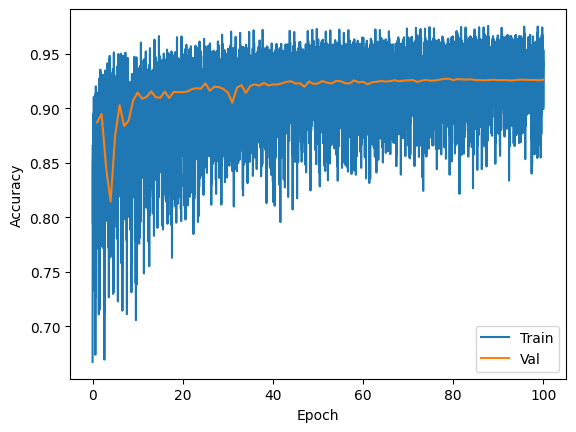

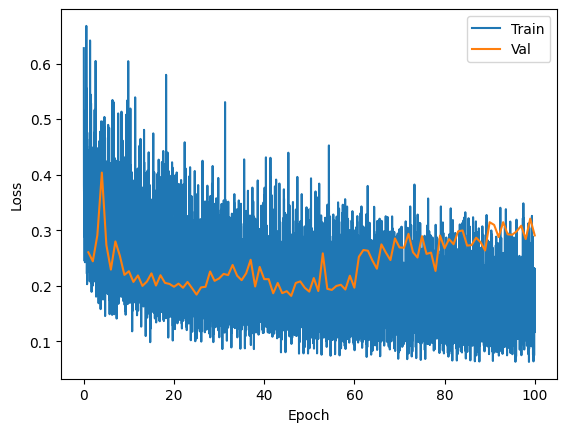

In [ ]:
# run training
bands = [0, 1, 2, 3] #R/G/B/NIR
%load_ext autoreload
%autoreload 2

torch.manual_seed(seed)
train_loader, val_loader, test_loader = create_dataloaders(data_dir=DATA_PATH, batch_size=batch_size, bands=bands)



results = run_training(experiment_name=f"MSNet_lr_{learning_rate}_num_epochs_{max_epochs}",
                        model=model,
                        num_epochs=max_epochs,
                        optimizer=optimizer,
                        criterion=criterion,
                        train_dl=train_loader,
                        val_dl=val_loader,
                        scheduler=scheduler,
                        lr=learning_rate,
                        batch_size=batch_size,
                        device=device,
                        project_name=project_name
                        )


torch.save(model.state_dict(), 'model_weights.pth')


In [ ]:
result = evaluate(model, device, test_loader, criterion)
print(result)

(0.2298114603062822, 0.9107365395363092, 0.7969078666548739, 0.843816675986601, 0.9347902737984527, 0.8869768800538436)


In [ ]:
result = evaluate(model, device, val_loader, criterion)
print(result)

(0.2906479549946195, 0.9262907608695652, 0.768109499141078, 0.8375656710520539, 0.9025584517217656, 0.868848337180717)


In [ ]:
loader = iter(test_loader)

In [ ]:
print(batch_mask.unsqueeze(1).shape)

torch.Size([16, 1, 224, 224])


Visualsing 16 examples


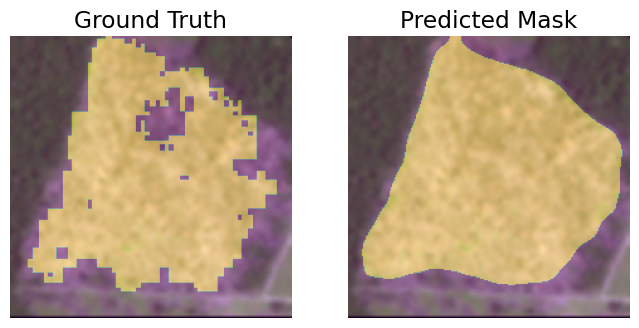

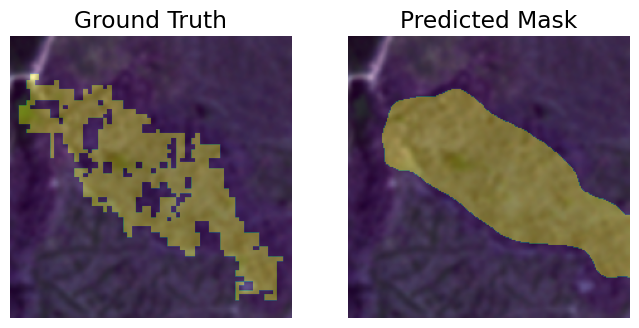

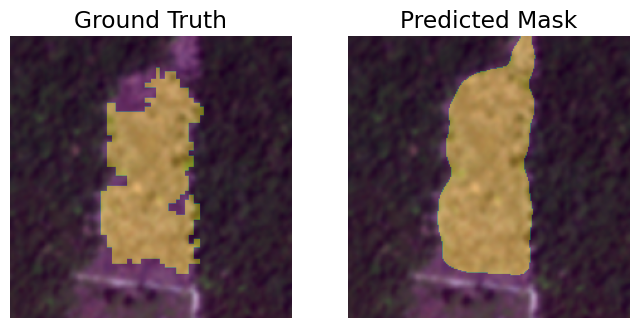

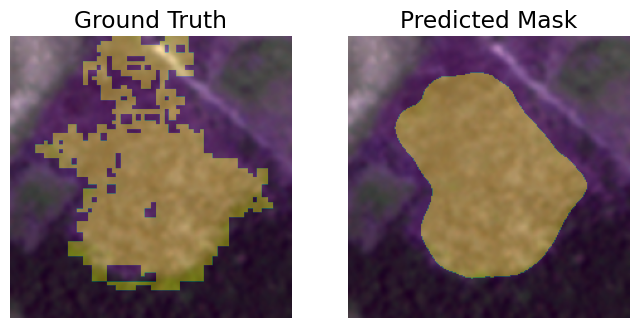

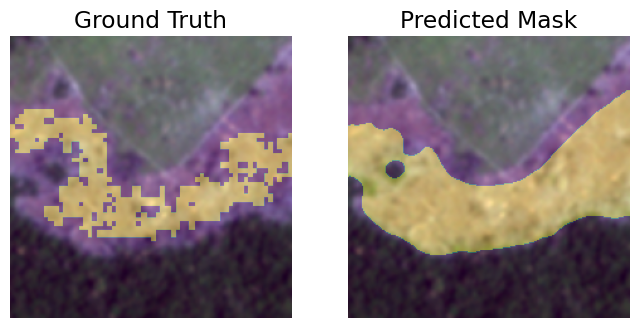

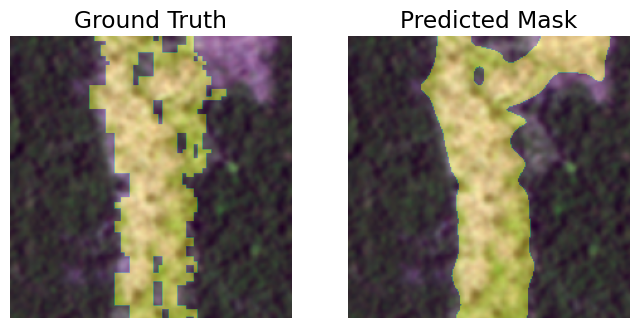

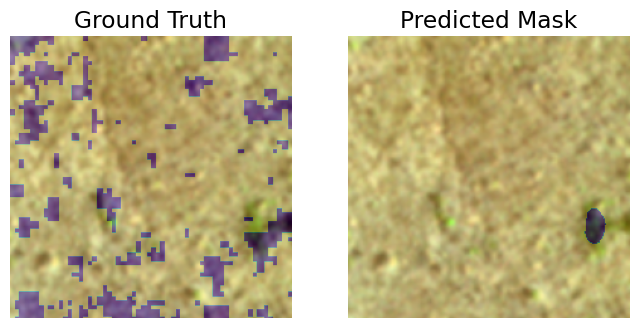

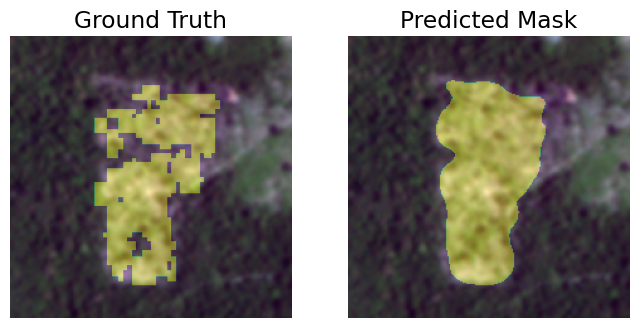

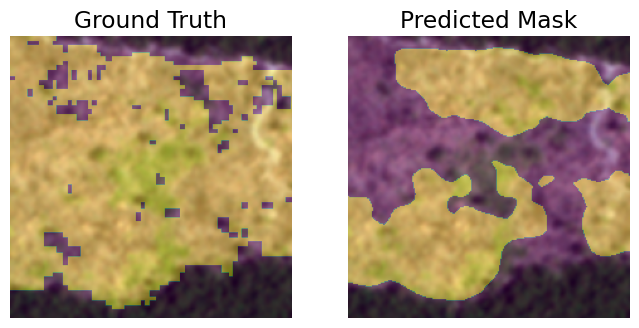

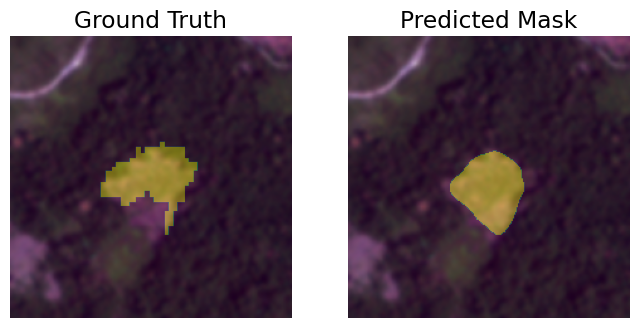

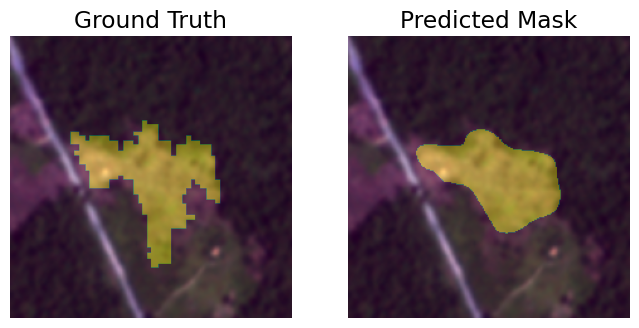

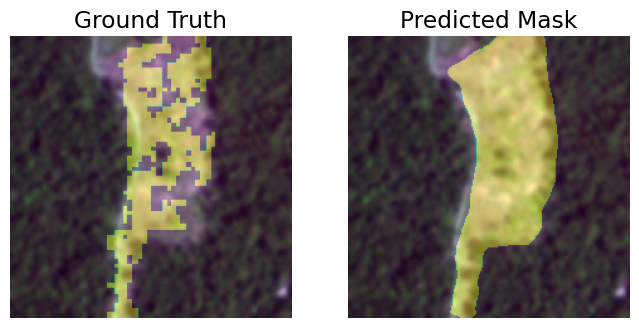

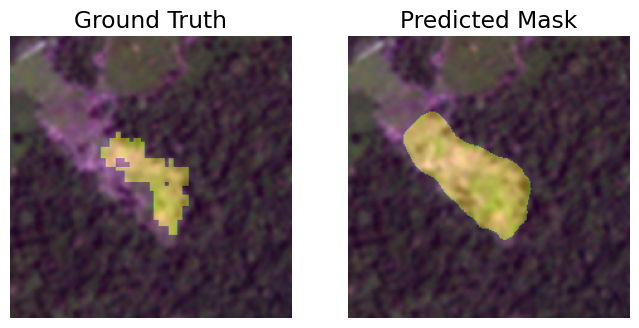

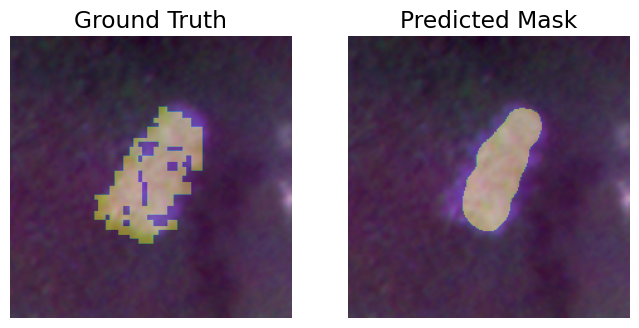

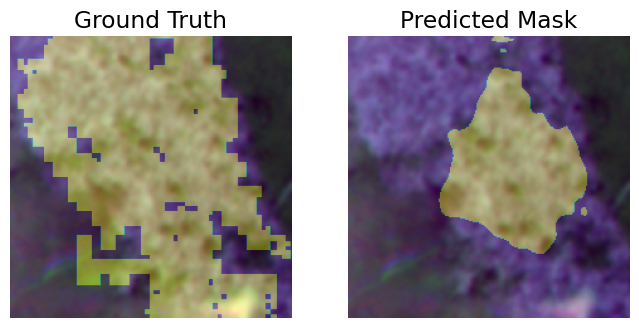

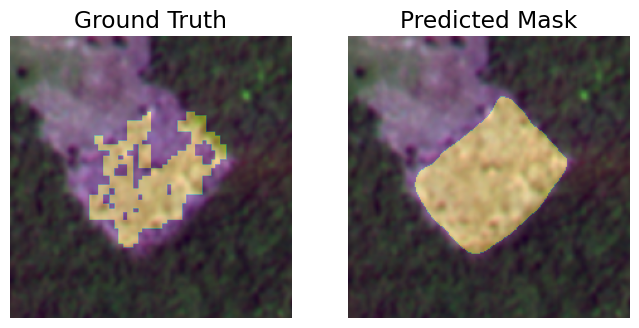

In [ ]:
batch_sample, batch_mask = next(loader)
batch_sample, batch_mask = batch_sample.to(device), batch_mask.to(device)
batch_output = model(batch_sample)
batch_predictions = batch_output.argmax(dim=1)
visualise_batch_predictions(batch_sample, batch_mask.unsqueeze(1), batch_predictions.unsqueeze(1), rescale=True, bands=bands)
